### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Loading the dataset using pandas library

In [2]:
df1 = pd.read_csv('horseasses-population-in-nepal-by-district.csv')
df2 = pd.read_csv('milk-animals-and-milk-production-in-nepal-by-district.csv')
df3 = pd.read_csv('net-meat-production-in-nepal-by-district.csv')
df4 = pd.read_csv('production-of-cotton-in-nepal-by-district.csv')
df5 = pd.read_csv('production-of-egg-in-nepal-by-district.csv')
df6 = pd.read_csv('rabbit-population-in-nepal-by-district.csv')
df7 = pd.read_csv('wool-production-in-nepal-by-district.csv')
df8 = pd.read_csv('yak-nak-chauri-population-in-nepal-by-district.csv')
provincedf = pd.read_excel('Province.xlsx')

#### Defining functions to visualize outliers in the dataset

In [3]:
# Defining a function to visualize the outliers
def outliersGraph(df):
    x = df['DISTRICT']
    for col in df.columns.values:
        if ((col == 'DISTRICT' or col == 'PROVINCE' or col == 'index')):
            pass
        else:
            y = df[col]
            plt.scatter(x,y)
            plt.xlabel('DISTRICT')
            plt.ylabel(col)
            plt.show()

In [4]:
# Defining a function to check the outliers...
def outliersData(df, column, outlier_value):
    for i in range (df.shape[0]):
        if df[column][i] > outlier_value:
            print(f"{column} in {df['DISTRICT'][i]} is: {df[column][i]}")

### Pre processing the dataset before merging to get relevant info

#### Viewing the first five and the last five rows in the dataset

In [5]:
df1.head()

,DISTRICT,Horses/Asses
0,TAPLEJUNG,543
1,SANKHUWASHAVA,358
2,SOLUKHUMBU,1775
3,PANCHTHAR,15
4,ILLAM,2815


In [6]:
df1.tail()

,DISTRICT,Horses/Asses
55,DOTI,252
56,BAITADI,484
57,DADELDHURA,241
58,FW.REGION,3811
59,Total,55808


### Checking MISSING values in the first dataset

In [7]:
df1.isnull().sum()
# It is clear that there is no any missing values in the first datatset

DISTRICT        0
Horses/Asses    0
dtype: int64

### Checking DUPLICATED values in the first dataset

In [8]:
# if there is any duplicated data, then True will be printed
if (df1.duplicated().any() == True):
    print(True)

### Checking the OUTLIERS

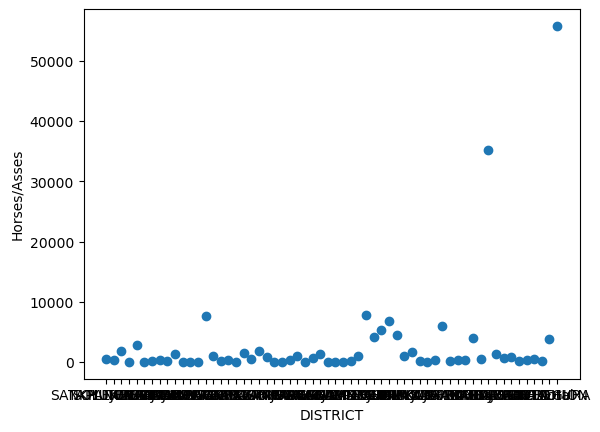

In [9]:
# Using the function defined above, we can create the scatter plot to check if there is any outliers
outliersGraph(df1)

In [10]:
# From the above graph, it seems like there are two outliers in the dataset where number of horses are greater than 10000..
outliersData(df1, 'Horses/Asses', 10000)

Horses/Asses in MW.REGION is: 35124
Horses/Asses in Total is: 55808


In [11]:
# Here the number of horses/asses seems to be valid in MW.Region but MW.Region is a development region and not a district, so it will be dropped soon.
# Whereas The Total row is the sum of all the rows, so it needs to be dropped.

### DROPING the last row, since it is the total of the rows, it hinders the model so we need to remove it

In [12]:
df1.drop(df1.tail(1).index, inplace=True)
df1.tail()

,DISTRICT,Horses/Asses
54,ACHHAM,95
55,DOTI,252
56,BAITADI,484
57,DADELDHURA,241
58,FW.REGION,3811


### SUMMARY table of the dataset

In [13]:
# the describe method of the pandas library generates a table with summary of the numerical columns (by default, but when include is set to 'all', it
# creates summary table for all data types)
df1.describe(include='all')

,DISTRICT,Horses/Asses
count,59,59.000000
unique,59,NaN
top,TAPLEJUNG,NaN
freq,1,NaN
mean,NaN,1891.796610
std,NaN,4828.277046
min,NaN,12.000000
25%,NaN,115.500000
50%,NaN,484.000000
75%,NaN,1385.000000


### Similarly performing the preprocessing method with SECOND dataset

#### Viewing the first five and the last five rows in the dataset

In [14]:
df2.head()

,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
0,TAPLEJUNG,8123,4987,5389,4257,9645.0
1,SANKHUWASHAVA,15342,13367,6988,10589,17577.0
2,SOLUKHUMBU,7819,13501,2948,5493,8441.0
3,E.MOUNTAIN,31284,31855,15324,20339,35663.0
4,PANCHTHAR,14854,11331,8511,9835,18346.0


In [15]:
df2.tail()

,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
91,KAILALI,27758,41103,27905,36677,64582.0
92,KANCHANPUR,20164,27812,23146,25876,49022.0
93,FW.TERAI,47922,68915,51051,62553,113604.0
94,FW. REGION,130595,132257,87936,112438,200374.0
95,NEPAL,1026135,1355384,643806,1210441,NaN


### Checking MISSING values in the second dataset


In [16]:
df2.isnull().sum()

DISTRICT                  0
MILKING  COWS NO.         0
MILKING  BUFFALOES NO.    0
COW MILK                  0
BUFF MILK                 0
TOTAL MILK PRODUCED       1
dtype: int64

### DROPING the null value as the row with null value is the sum of the values.

In [17]:
df2.dropna(inplace=True)
df2

,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
0,TAPLEJUNG,8123,4987,5389,4257,9645.0
1,SANKHUWASHAVA,15342,13367,6988,10589,17577.0
2,SOLUKHUMBU,7819,13501,2948,5493,8441.0
3,E.MOUNTAIN,31284,31855,15324,20339,35663.0
4,PANCHTHAR,14854,11331,8511,9835,18346.0
...,...,...,...,...,...,...
90,FW.HILLS,45036,39569,22850,33505,56355.0
91,KAILALI,27758,41103,27905,36677,64582.0
92,KANCHANPUR,20164,27812,23146,25876,49022.0
93,FW.TERAI,47922,68915,51051,62553,113604.0


### Checking DUPLICATED values in the second dataset

In [18]:
if (df2.duplicated().any() == True):
    print(True)

### CHECKING the outliers

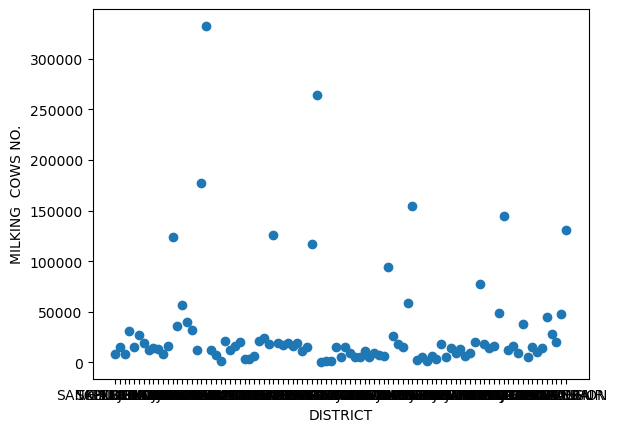

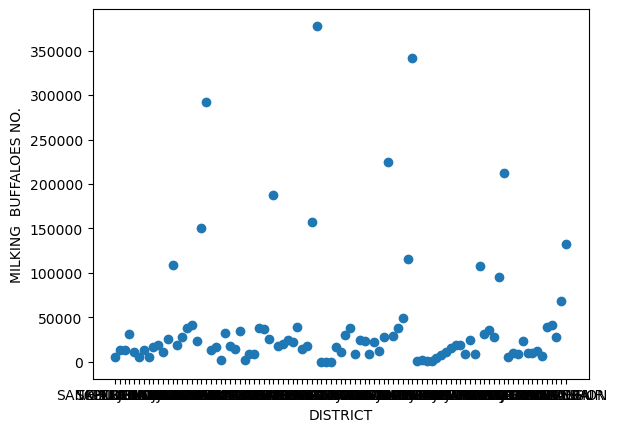

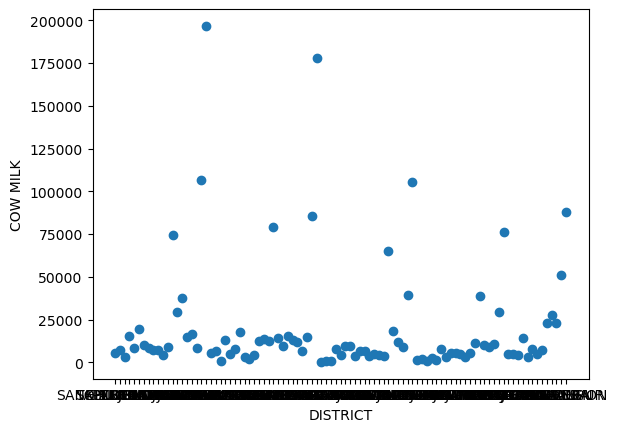

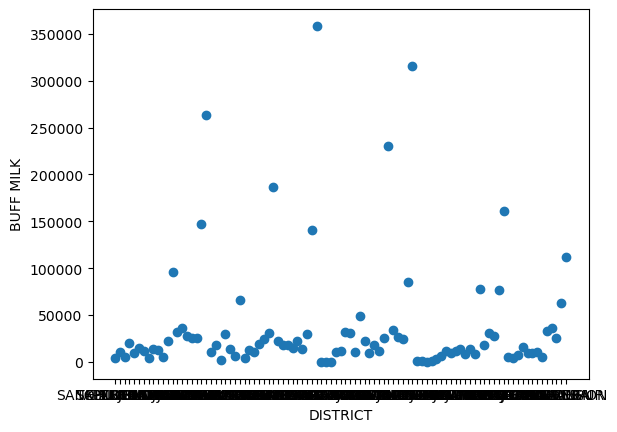

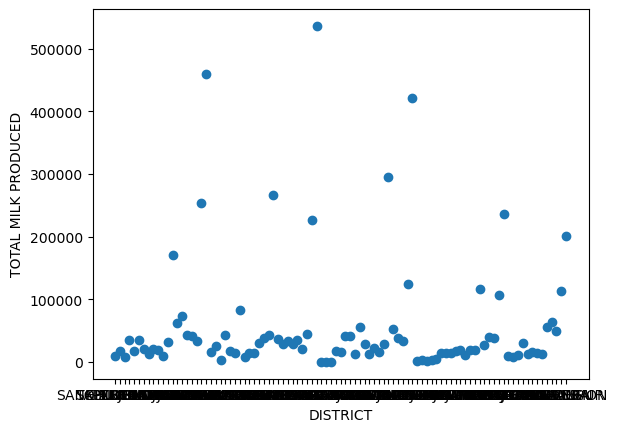

In [19]:
outliersGraph(df2)

In [20]:
# To be more specific on outliers, the previously defined function 'outliersData' has been used with parameters as the dataset itself, the column in
# which outliers needs to be checked and the outlier data range above which outliers lie.

In [21]:
outliersData(df2, 'MILKING  COWS NO.', 200000)

MILKING  COWS NO. in E. REGION is: 332384
MILKING  COWS NO. in C. REGION is: 263728


In [22]:
outliersData(df2, 'MILKING  BUFFALOES NO.', 300000)

MILKING  BUFFALOES NO. in C. REGION is: 377741
MILKING  BUFFALOES NO. in W. REGION is: 341323


In [23]:
outliersData(df2, 'COW MILK', 125000)

COW MILK in E. REGION is: 196708
COW MILK in C. REGION is: 177815


In [24]:
outliersData(df2, 'BUFF MILK', 250000)

BUFF MILK in E. REGION is: 263199
BUFF MILK in C. REGION is: 358483
BUFF MILK in W. REGION is: 315616


In [25]:
outliersData(df2, 'TOTAL MILK PRODUCED', 300000)

TOTAL MILK PRODUCED in E. REGION is: 459907.0
TOTAL MILK PRODUCED in C. REGION is: 536299.0
TOTAL MILK PRODUCED in W. REGION is: 420806.0


### Summary of The Dataset

In [26]:
df2.describe(include='all')

,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
count,95,95.000000,95.000000,95.000000,95.000000,95.000000
unique,95,NaN,NaN,NaN,NaN,NaN
top,TAPLEJUNG,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,32404.263158,42801.600000,20330.726316,38224.463158,58555.189474
std,NaN,53312.028056,69727.019754,33756.056268,64601.251390,96696.838132
min,NaN,452.000000,0.000000,259.000000,0.000000,259.000000
25%,NaN,8026.500000,10030.000000,4620.500000,9060.000000,14179.500000
50%,NaN,14942.000000,19501.000000,8176.000000,16380.000000,28027.000000
75%,NaN,24902.500000,36335.000000,15349.000000,30918.000000,43324.000000


### Similarly performing the preprocessing method with THIRD dataset

#### Viewing the first five and the last five rows in the dataset

In [27]:
print(f"First 5 values are:\n {df3.head()}\n")
print(f"Last 5 values are:\n {df3.tail()}")

First 5 values are:
         DISTRICT  BUFF  MUTTON  CHEVON  PORK   CHICKEN  DUCK MEAT  TOTAL MEAT
0      TAPLEJUNG   607      31     491    443      172          0        1744
1  SANKHUWASABHA  1646      41     958    509      302          1        3457
2     SOLUKHUMBU  1123      28     416    428      166          0        2161
3     E.MOUNTAIN  3376     100    1865   1380      640          1        7362
4      PANCHTHAR  1496       4     940    730      248          1        3419

Last 5 values are:
       DISTRICT    BUFF  MUTTON  CHEVON  PORK   CHICKEN  DUCK MEAT  TOTAL MEAT
91     KAILALI    5962      71    1480    469     1303          4        9289
92  KANCHANPUR    3816      27     850    360     1085          2        6140
93    FW.TERAI    9778      98    2330    829     2388          6       15429
94   FW.REGION   18154     335    6893    985     2734          6       29107
95       NEPAL  175005    2684   65583  23509    55041        237      322059


### Checking MISSING values in the third dataset


In [28]:
df3.isnull().sum()

DISTRICT      0
BUFF          0
MUTTON        0
CHEVON        0
PORK          0
CHICKEN       0
DUCK MEAT     0
TOTAL MEAT    0
dtype: int64

### Checking DUPLICATED values in the third dataset

In [29]:
if (df3.duplicated().any()):
    print(True)

### Checking the OUTLIERS

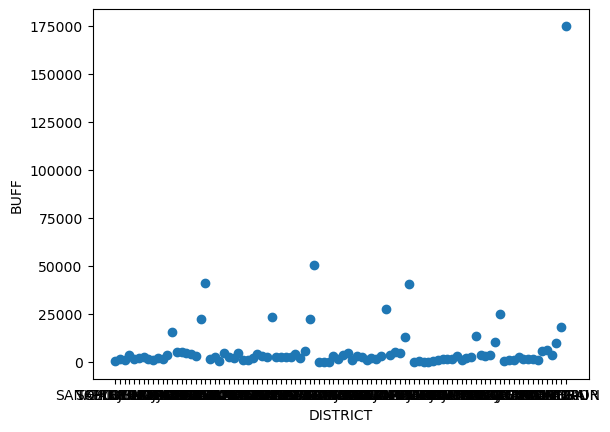

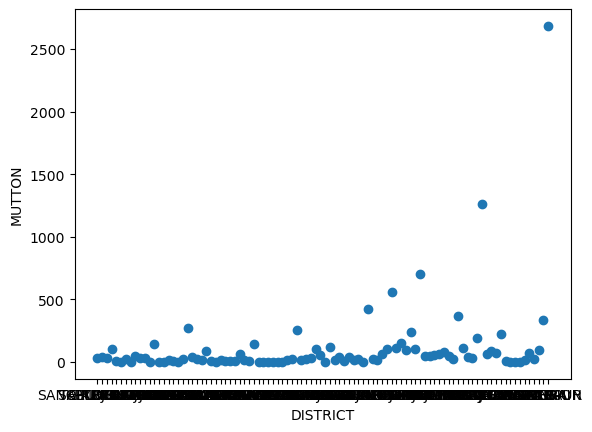

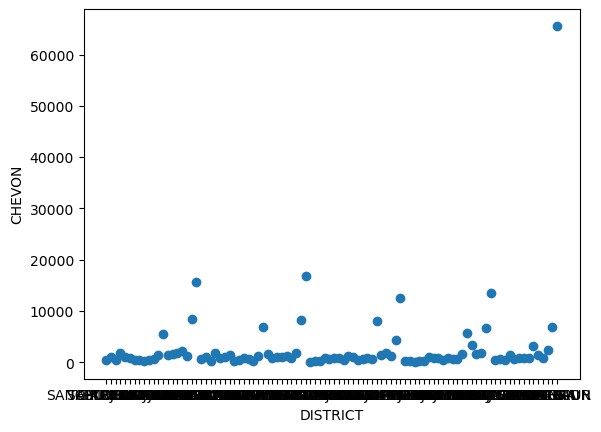

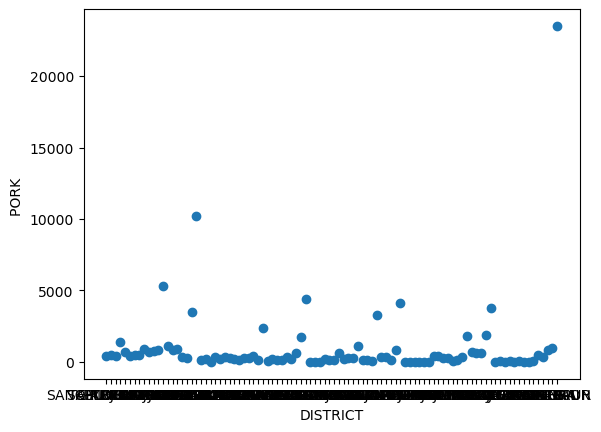

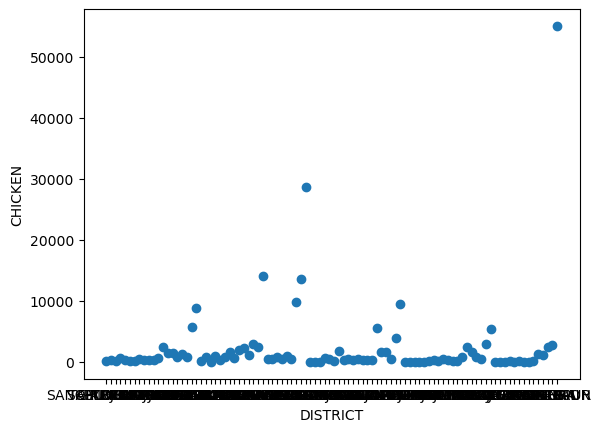

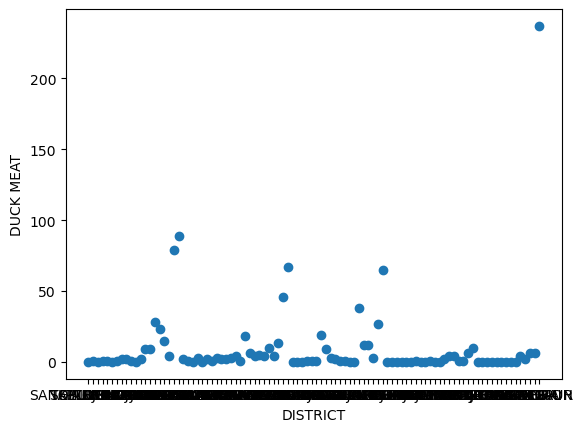

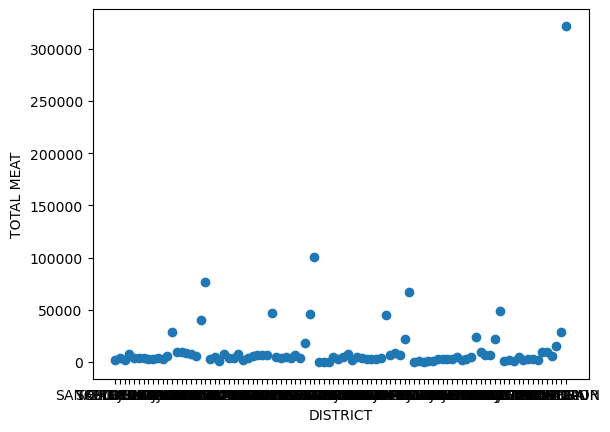

In [30]:
outliersGraph(df3)

In [31]:
outliersData(df3, 'BUFF', 75000)

BUFF in NEPAL is: 175005


In [32]:
outliersData(df3, 'MUTTON', 1500)

MUTTON in NEPAL is: 2684


In [33]:
outliersData(df3, 'CHEVON', 20000)

CHEVON in NEPAL is: 65583


In [34]:
outliersData(df3, 'PORK ', 12500)

PORK  in NEPAL is: 23509


In [35]:
outliersData(df3, 'CHICKEN', 30000)

CHICKEN in NEPAL is: 55041


In [36]:
outliersData(df3, 'DUCK MEAT', 100)

DUCK MEAT in NEPAL is: 237


In [37]:
outliersData(df3, 'TOTAL MEAT', 120000)

TOTAL MEAT in NEPAL is: 322059


### DROPING the last row, since it is the total of the rows, it hinders the model so we need to remove it

In [38]:
df3.drop(df3.tail(1).index, inplace=True)
df3

,DISTRICT,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
0,TAPLEJUNG,607,31,491,443,172,0,1744
1,SANKHUWASABHA,1646,41,958,509,302,1,3457
2,SOLUKHUMBU,1123,28,416,428,166,0,2161
3,E.MOUNTAIN,3376,100,1865,1380,640,1,7362
4,PANCHTHAR,1496,4,940,730,248,1,3419
...,...,...,...,...,...,...,...,...
90,FW.HILLS,5692,14,3103,87,237,0,9133
91,KAILALI,5962,71,1480,469,1303,4,9289
92,KANCHANPUR,3816,27,850,360,1085,2,6140
93,FW.TERAI,9778,98,2330,829,2388,6,15429


### SUMMARY table of the dataset

In [39]:
df3.describe(include='all')

,DISTRICT,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
count,95,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
unique,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TAPLEJUNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5526.473684,84.757895,2071.042105,742.389474,1738.136842,7.484211,10170.284211
std,NaN,9016.595966,168.883424,3254.582828,1409.766853,3837.750102,16.427055,16832.600119
min,NaN,0.000000,0.000000,56.000000,1.000000,5.000000,0.000000,78.000000
25%,NaN,1431.000000,10.000000,574.000000,113.000000,206.500000,0.000000,2755.000000
50%,NaN,2538.000000,31.000000,870.000000,308.000000,474.000000,2.000000,4479.000000
75%,NaN,4428.500000,87.000000,1665.000000,692.000000,1524.000000,5.500000,7780.000000


### Similarly performing the preprocessing method with FOURTH dataset

#### Viewing the first five and the last five rows in the dataset

In [40]:
print(f"First 5 values are:\n {df4.head()}\n")
print(f"Last 5 values are:\n {df4.tail()}")

First 5 values are:
   DISTRICT  AREA (Ha.)  PROD. (Mt.)  YIELD Kg/Ha
0     Dang         106           74          700
1    Banke          27           41         1519
2  Bardiya          10           12         1200
3    NEPAL         143          127          890

Last 5 values are:
   DISTRICT  AREA (Ha.)  PROD. (Mt.)  YIELD Kg/Ha
0     Dang         106           74          700
1    Banke          27           41         1519
2  Bardiya          10           12         1200
3    NEPAL         143          127          890


### Checking MISSING values in the fourth dataset

In [41]:
df4.isnull().sum()

DISTRICT       0
AREA (Ha.)     0
PROD. (Mt.)    0
YIELD Kg/Ha    0
dtype: int64

### Checking DUPLICATED values in the fourth dataset

In [42]:
if (df4.duplicated().any()):
    print(True)

### Checking the OUTLIERS

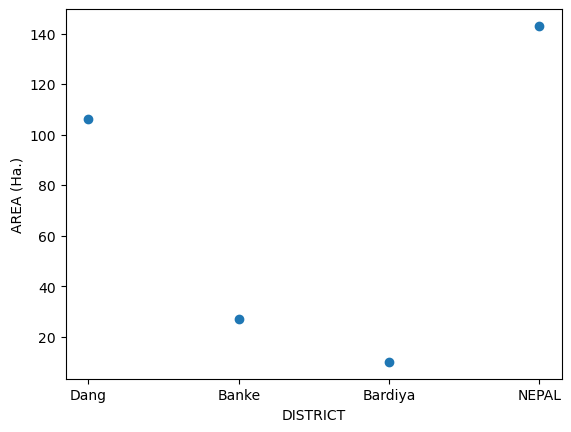

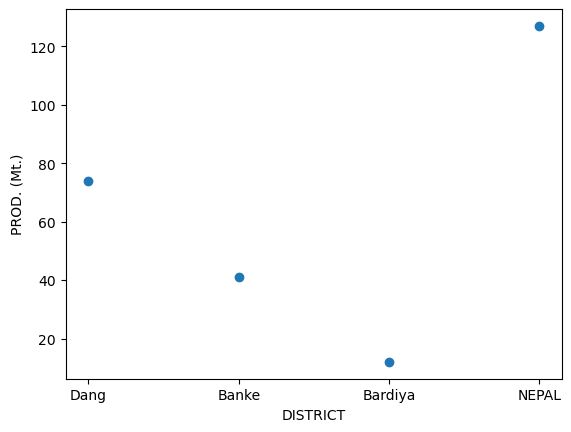

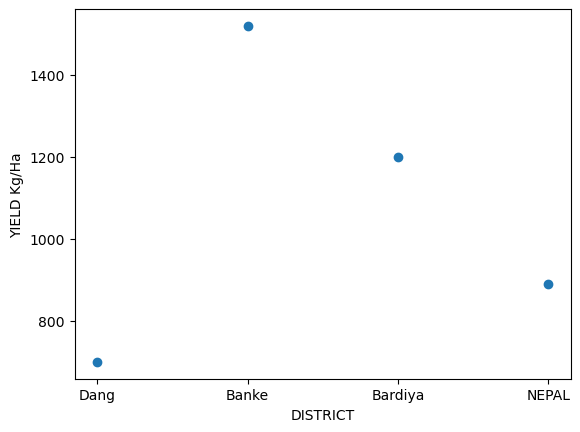

In [43]:
outliersGraph(df4)

In [44]:
outliersData(df4, 'AREA (Ha.)', 120)

AREA (Ha.) in NEPAL is: 143


In [45]:
outliersData(df4, 'PROD. (Mt.)', 80)

PROD. (Mt.) in NEPAL is: 127


In [46]:
outliersData(df4, 'YIELD Kg/Ha', 1200)

YIELD Kg/Ha in Banke is: 1519


### DROPING the last row, since it is the total of the rows, it hinders the model so we need to remove it

In [47]:
df4.drop(df4.tail(1).index, inplace=True)
df4

,DISTRICT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
0,Dang,106,74,700
1,Banke,27,41,1519
2,Bardiya,10,12,1200


### SUMMARY table of the dataset

In [48]:
df4.describe(include='all')

,DISTRICT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
count,3,3.000000,3.000000,3.000000
unique,3,NaN,NaN,NaN
top,Dang,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,47.666667,42.333333,1139.666667
std,NaN,51.228247,31.021498,412.819977
min,NaN,10.000000,12.000000,700.000000
25%,NaN,18.500000,26.500000,950.000000
50%,NaN,27.000000,41.000000,1200.000000
75%,NaN,66.500000,57.500000,1359.500000


### Similarly performing the preprocessing method with FIFTH dataset

#### Viewing the first five and the last five rows in the dataset

In [49]:
print(f"First 5 values are:\n {df5.head()}\n")
print(f"Last 5 values are:\n {df5.tail()}")

First 5 values are:
         DISTRICT  LAYING HEN  LAYING DUCK  HEN EGG  DUCK EGG  TOTAL EGG
0      TAPLEJUNG     15366.0          341     2420        25       2445
1  SANKHUWASHAVA     77512.0          465     5506        34       5540
2     SOLUKHUMBU     42671.0          374     2345        28       2373
3     E.MOUNTAIN    135548.0         1180    10271        87      10358
4      PANCHTHAR     63779.0          261     5581        19       5600

Last 5 values are:
       DISTRICT  LAYING HEN  LAYING DUCK  HEN EGG  DUCK EGG  TOTAL EGG
91     KAILALI    277409.3         3418    16928       275      17203
92  KANCHANPUR    186108.0         1932    13483       155      13638
93    FW.TERAI    463517.8         5350    30411       430      30841
94   FW.REGION    537737.0         6372    40743       504      41247
95       NEPAL  12353515.0       180927  1294166     13906    1308072


### Checking Missing values in the fifth dataset

In [50]:
df5.isnull().sum()

DISTRICT       0
LAYING HEN     0
LAYING DUCK    0
HEN EGG        0
DUCK EGG       0
TOTAL EGG      0
dtype: int64

### Checking Duplicate values in the fifth dataset

In [51]:
if (df5.duplicated().any()):
    print(True)

### Checking the OUTLIERS

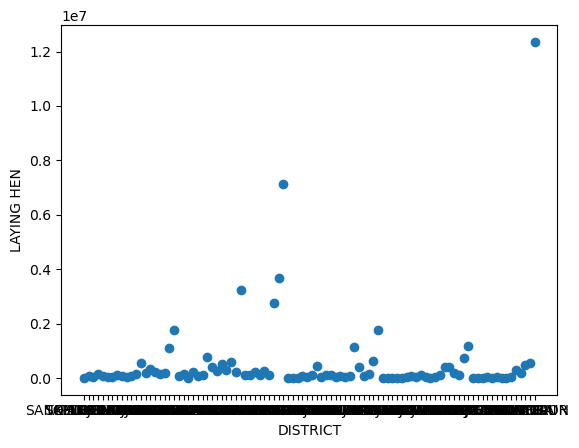

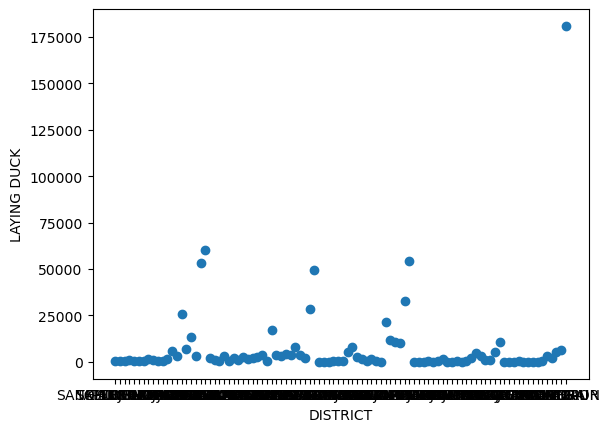

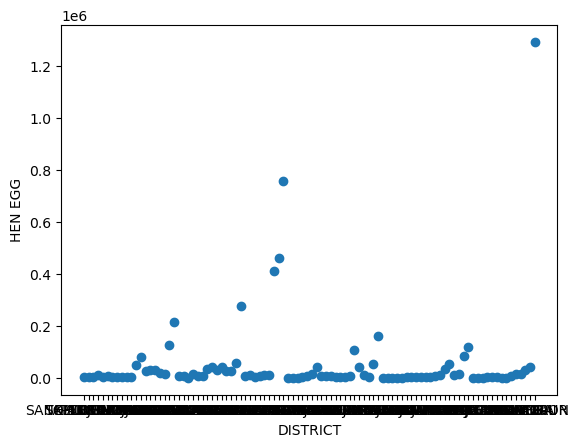

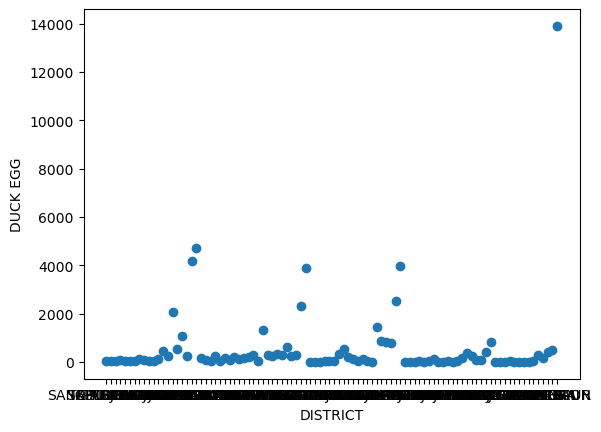

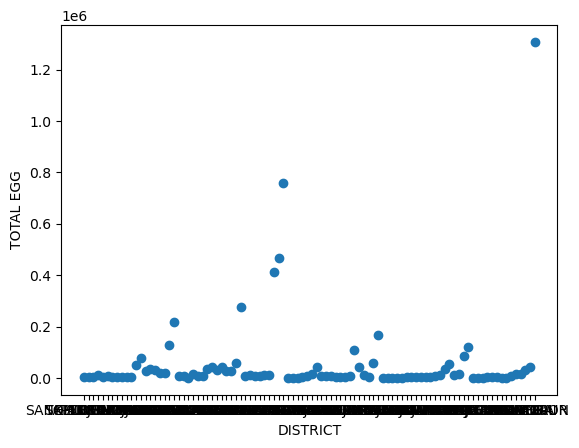

In [52]:
outliersGraph(df5)

In [53]:
outliersData(df5, 'LAYING HEN', 8000000)

LAYING HEN in NEPAL is: 12353515.0


In [54]:
outliersData(df5, 'LAYING DUCK', 75000)

LAYING DUCK in NEPAL is: 180927


In [55]:
outliersData(df5, 'HEN EGG', 800000)

HEN EGG in NEPAL is: 1294166


In [56]:
outliersData(df5, 'DUCK EGG', 6000)

DUCK EGG in NEPAL is: 13906


In [57]:
outliersData(df5, 'TOTAL EGG', 800000)

TOTAL EGG in NEPAL is: 1308072


### DROPING the last row, since it is the total of the rows, it hinders the model so we need to remove it

In [58]:
df5.drop(df5.tail(1).index, inplace=True)
df5

,DISTRICT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
0,TAPLEJUNG,15366.0,341,2420,25,2445
1,SANKHUWASHAVA,77512.0,465,5506,34,5540
2,SOLUKHUMBU,42671.0,374,2345,28,2373
3,E.MOUNTAIN,135548.0,1180,10271,87,10358
4,PANCHTHAR,63779.0,261,5581,19,5600
...,...,...,...,...,...,...
90,FW.HILLS,48735.0,535,7717,39,7756
91,KAILALI,277409.3,3418,16928,275,17203
92,KANCHANPUR,186108.0,1932,13483,155,13638
93,FW.TERAI,463517.8,5350,30411,430,30841


### SUMMARY table of the dataset

In [59]:
df5.describe(include='all')

,DISTRICT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
count,95,9.500000e+01,95.000000,95.000000,95.000000,95.000000
unique,95,NaN,NaN,NaN,NaN,NaN
top,TAPLEJUNG,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.901110e+05,5713.484211,40868.400000,439.136842,41307.536842
std,NaN,9.370576e+05,11901.600096,104931.157327,917.676467,105518.528667
min,NaN,1.488000e+03,3.000000,210.000000,0.000000,211.000000
25%,NaN,3.281000e+04,317.500000,3040.500000,24.500000,3079.000000
50%,NaN,1.112580e+05,1400.000000,7717.000000,109.000000,7858.000000
75%,NaN,2.850832e+05,4135.500000,31005.500000,309.500000,31543.500000


### Similarly performing the preprocessing method with SIXTH dataset

#### Viewing the first five and the last five rows in the dataset

In [60]:
print(f"First 5 values are:\n {df6.head()}\n")
print(f"Last 5 values are:\n {df6.tail()}")

First 5 values are:
         DISTRICT  Rabbit
0      TAPLEJUNG     506
1  SANKHUWASHAVA     313
2     SOLUKHUMBU     105
3      PANCHTHAR      29
4          ILLAM     240

Last 5 values are:
      DISTRICT  Rabbit
50    BAJHANG     148
51   DARCHULA     522
52       DOTI     432
53  FW.REGION    1387
54      Total   32213


### Checking MISSING values in the sixth dataset

In [61]:
df6.isnull().sum()

DISTRICT    0
Rabbit      0
dtype: int64

### Checking DUPLICATED values in the sixth dataset


In [62]:
if (df6.duplicated().any()):
    print(True)

### Checking the OUTLIERS

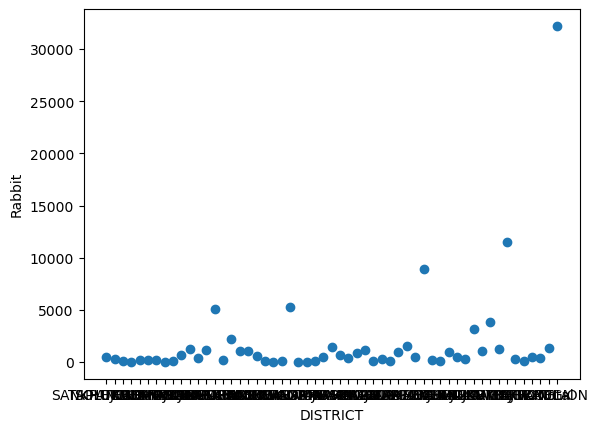

In [63]:
outliersGraph(df6)

In [64]:
outliersData(df6, 'Rabbit', 12500)

Rabbit in Total is: 32213


### DROPING the last row, since it is the total of the rows, it hinders the model so we need to remove it

In [65]:
df6.drop(df6.tail(1).index, inplace=True)
df6.tail()

,DISTRICT,Rabbit
49,BAJURA,285
50,BAJHANG,148
51,DARCHULA,522
52,DOTI,432
53,FW.REGION,1387


### SUMMARY table of the dataset

In [66]:
df6.describe(include='all')

,DISTRICT,Rabbit
count,54,54.000000
unique,54,NaN
top,TAPLEJUNG,NaN
freq,1,NaN
mean,NaN,1193.074074
std,NaN,2130.010177
min,NaN,19.000000
25%,NaN,165.500000
50%,NaN,502.000000
75%,NaN,1124.000000


### Similarly performing the preprocessing method with SEVENTH dataset


#### Viewing the first five and the last five rows in the dataset

In [67]:
print(f"First 5 values are:\n {df7.head()}\n")
print(f"Last 5 values are:\n {df7.tail()}")

First 5 values are:
         DISTRICT  SHEEPS NO.  SHEEP WOOL PRODUCED
0      TAPLEJUNG        5777                 3519
1  SANKHUWASHAVA       12181                 9050
2     SOLUKHUMBU        8461                 6286
3     E.MOUNTAIN       26419                18855
4      PANCHTHAR        1338                  994

Last 5 values are:
       DISTRICT  SHEEPS NO.  SHEEP WOOL PRODUCED
91     KAILALI       21267                15801
92  KANCHANPUR        7953                 5909
93    FW.TERAI       29220                21710
94   FW.REGION      102571                76314
95       NEPAL      800658               588348


### Checking MISSING values in the seventh dataset

In [68]:
df7.isnull().sum()

DISTRICT               0
SHEEPS NO.             0
SHEEP WOOL PRODUCED    0
dtype: int64

### Checking DUPLICATED values in the seventh dataset

In [69]:
if (df7.duplicated().any()):
    print(True)

### Checking the OUTLIERS

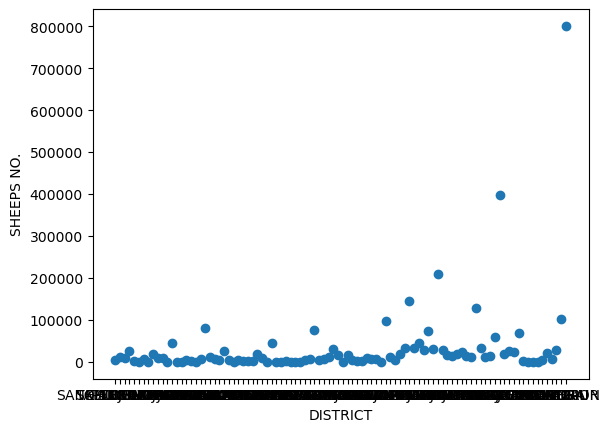

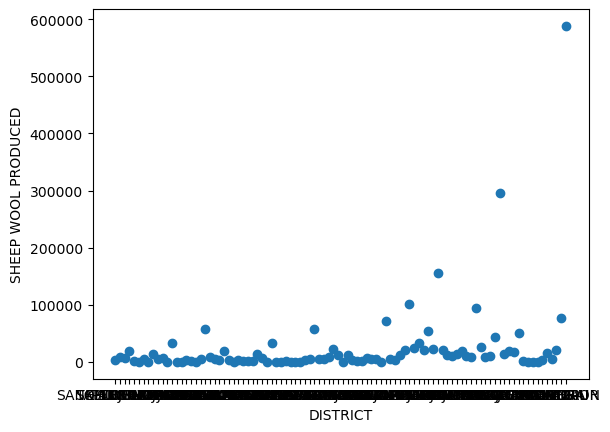

In [70]:
outliersGraph(df7)

In [71]:
outliersData(df7, 'SHEEPS NO.', 300000)

SHEEPS NO. in MW.REGION is: 397057
SHEEPS NO. in NEPAL is: 800658


In [72]:
outliersData(df7, 'SHEEP WOOL PRODUCED', 200000)

SHEEP WOOL PRODUCED in MW.REGION is: 295006
SHEEP WOOL PRODUCED in NEPAL is: 588348


### DROPING the last row, since it is the total of the rows, it hinders the model so we need to remove it

In [73]:
df7.drop(df7.tail(1).index, inplace=True)
df7

,DISTRICT,SHEEPS NO.,SHEEP WOOL PRODUCED
0,TAPLEJUNG,5777,3519
1,SANKHUWASHAVA,12181,9050
2,SOLUKHUMBU,8461,6286
3,E.MOUNTAIN,26419,18855
4,PANCHTHAR,1338,994
...,...,...,...
90,FW.HILLS,4366,3350
91,KAILALI,21267,15801
92,KANCHANPUR,7953,5909
93,FW.TERAI,29220,21710


### SUMMARY table of the dataset

In [74]:
df7.describe(include='all')

,DISTRICT,SHEEPS NO.,SHEEP WOOL PRODUCED
count,95,95.000000,95.000000
unique,95,NaN,NaN
top,TAPLEJUNG,NaN,NaN
freq,1,NaN,NaN
mean,NaN,25283.936842,18579.410526
std,NaN,51233.139796,37928.059910
min,NaN,36.000000,13.000000
25%,NaN,2621.000000,1946.500000
50%,NaN,9105.000000,6286.000000
75%,NaN,25759.500000,18752.000000


### Similarly performing the preprocessing method with EIGTH dataset

#### Viewing the first five and the last five rows in the dataset

In [75]:
print(f"First 5 values are:\n {df8.head()}\n")
print(f"Last 5 values are:\n {df8.tail()}")

First 5 values are:
         DISTRICT  YAK/NAK/CHAURI
0      TAPLEJUNG            3465
1  SANKHUWASHAVA            3945
2     SOLUKHUMBU           12235
3      PANCHTHAR            1075
4          ILLAM             165

Last 5 values are:
      DISTRICT  YAK/NAK/CHAURI
30     BAJURA              89
31    BAJHANG             381
32   DARCHULA             422
33  FW.REGION             892
34      Total           68831


### Checking MISSING values in the eigth dataset

In [76]:
df8.isnull().sum()

DISTRICT          0
YAK/NAK/CHAURI    0
dtype: int64

### Checking DUPLICATED values in the eigth dataset

In [77]:
if (df8.duplicated().any()):
    print(True)

### Checking the OUTLIERS

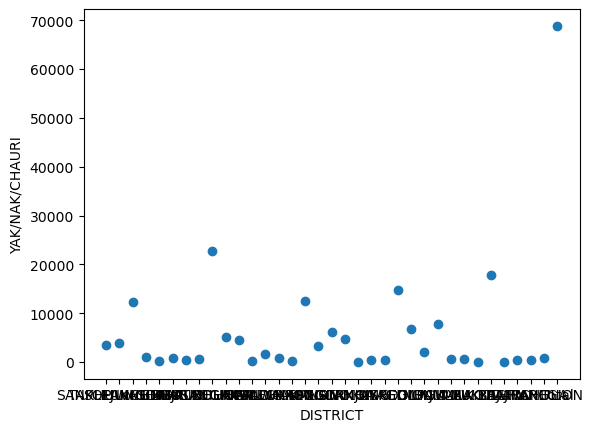

In [78]:
outliersGraph(df8)

In [79]:
outliersData(df8, 'YAK/NAK/CHAURI', 30000)

YAK/NAK/CHAURI in Total is: 68831


### DROPING the last row, since it is the total of the rows, it hinders the model so we need to remove it

In [80]:
df8.drop(df8.tail(1).index, inplace=True)
df8

,DISTRICT,YAK/NAK/CHAURI
0,TAPLEJUNG,3465
1,SANKHUWASHAVA,3945
2,SOLUKHUMBU,12235
3,PANCHTHAR,1075
4,ILLAM,165
5,BHOJPUR,887
6,KHOTANG,350
7,OKHALDHUNGA,675
8,E.REGION,22797
9,DOLAKHA,5053


In [81]:
df8.describe(include='all')

,DISTRICT,YAK/NAK/CHAURI
count,34,34.000000
unique,34,NaN
top,TAPLEJUNG,NaN
freq,1,NaN
mean,NaN,4048.882353
std,NaN,5686.543562
min,NaN,25.000000
25%,NaN,399.500000
50%,NaN,997.500000
75%,NaN,4948.750000


### After pre processing each dataset, merging them into a single dataset...

In [82]:
merged_dataset = (df1.merge(df2, on='DISTRICT', how='outer'))
merged_dataset = (merged_dataset.merge(df3, on='DISTRICT', how='outer'))
merged_dataset = (merged_dataset.merge(df4, on='DISTRICT', how='outer'))
merged_dataset = (merged_dataset.merge(df5, on='DISTRICT', how='outer'))
merged_dataset = (merged_dataset.merge(df6, on='DISTRICT', how='outer'))
merged_dataset = (merged_dataset.merge(df7, on='DISTRICT', how='outer'))
merged_dataset = (merged_dataset.merge(df8, on='DISTRICT', how='outer'))

In [83]:
# For convenience, converting the uppercase district names to lowercase
merged_dataset['DISTRICT'] = merged_dataset['DISTRICT'].str.lower()

In [84]:
# Displaying the merged dataset
merged_dataset
# it seems like there are few districts with spelling errors representing same districts in two rows and even district with same spelling, such things
# needs to be cleaned...

,DISTRICT,Horses/Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
0,taplejung,543.0,8123.0,4987.0,5389.0,4257.0,9645.0,607.0,31.0,491.0,...,NaN,15366.0,341.0,2420.0,25.0,2445.0,506.0,5777.0,3519.0,3465.0
1,sankhuwashava,358.0,15342.0,13367.0,6988.0,10589.0,17577.0,NaN,NaN,NaN,...,NaN,77512.0,465.0,5506.0,34.0,5540.0,313.0,12181.0,9050.0,3945.0
2,solukhumbu,1775.0,7819.0,13501.0,2948.0,5493.0,8441.0,1123.0,28.0,416.0,...,NaN,42671.0,374.0,2345.0,28.0,2373.0,105.0,8461.0,6286.0,12235.0
3,panchthar,15.0,14854.0,11331.0,8511.0,9835.0,18346.0,1496.0,4.0,940.0,...,NaN,63779.0,261.0,5581.0,19.0,5600.0,29.0,1338.0,994.0,1075.0
4,illam,2815.0,26821.0,5759.0,19735.0,15261.0,34996.0,1974.0,1.0,870.0,...,NaN,26781.0,332.0,6656.0,27.0,6683.0,240.0,160.0,118.0,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,sankhuwasabha,NaN,NaN,NaN,NaN,NaN,NaN,1646.0,41.0,958.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,dang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,banke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1519.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,bardiya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### PRE PROCESSING the merged dataset

### Checking the NULL values in the MERGED dataset as it may contain null values

In [85]:
null_values_count = merged_dataset.isnull().sum()
null_values_count

DISTRICT                    0
Horses/Asses               47
MILKING  COWS NO.          11
MILKING  BUFFALOES NO.     11
COW MILK                   11
BUFF MILK                  11
TOTAL MILK PRODUCED        11
BUFF                       11
MUTTON                     11
CHEVON                     11
PORK                       11
CHICKEN                    11
DUCK MEAT                  11
TOTAL MEAT                 11
AREA (Ha.)                103
PROD. (Mt.)               103
YIELD Kg/Ha               103
LAYING HEN                 11
LAYING DUCK                11
HEN EGG                    11
DUCK EGG                   11
TOTAL EGG                  11
Rabbit                     52
SHEEPS NO.                 11
SHEEP WOOL PRODUCED        11
YAK/NAK/CHAURI             72
dtype: int64

### As there are 106 rows, columns with more than 50 null values would be cause ML model to bias the result. So we need to DROP it

In [86]:
# droping the columns with more than 50 null values
dropable_columns = null_values_count[null_values_count > 50].index.tolist()
merged_dataset.drop(columns=dropable_columns, inplace=True)

In [87]:
merged_dataset.isnull().sum()
# Now no column has null value greater than 50

DISTRICT                   0
Horses/Asses              47
MILKING  COWS NO.         11
MILKING  BUFFALOES NO.    11
COW MILK                  11
BUFF MILK                 11
TOTAL MILK PRODUCED       11
BUFF                      11
MUTTON                    11
CHEVON                    11
PORK                      11
CHICKEN                   11
DUCK MEAT                 11
TOTAL MEAT                11
LAYING HEN                11
LAYING DUCK               11
HEN EGG                   11
DUCK EGG                  11
TOTAL EGG                 11
SHEEPS NO.                11
SHEEP WOOL PRODUCED       11
dtype: int64

### Checking the DUPLICATED values in the MERGED dataset

In [88]:
if (merged_dataset.duplicated().any()):
    print(True)

### As there could be same districts with different spellings, so to check it we can sort in alphabetical order so that it would be easy to spot

In [89]:
dis = []
for district in merged_dataset['DISTRICT']:
    dis.append(district)
dis.sort()
dis

['achham',
 'arghakhanchi',
 'baglung',
 'baitadi',
 'bajhang',
 'bajura',
 'banke',
 'banke',
 'bara',
 'bardiya',
 'bardiya',
 'bhaktapur',
 'bhojpur',
 'c. region',
 'c.hills',
 'c.mountain',
 'c.region',
 'c.terai',
 'chitwan',
 'dadeldhura',
 'dailekh',
 'dang',
 'dang',
 'darchula',
 'dhading',
 'dhankuta',
 'dhanusha',
 'dolakha',
 'dolpa',
 'doti',
 'e. region',
 'e.hills',
 'e.mountain',
 'e.region',
 'e.terai',
 'fw. region',
 'fw.hills',
 'fw.mountain',
 'fw.region',
 'fw.terai',
 'gorkha',
 'gulmi',
 'humla',
 'illam',
 'jajarkot',
 'jhapa',
 'jumla',
 'kailali',
 'kalikot',
 'kanchanpur',
 'kapilbastu',
 'kaski',
 'kathmandu',
 'kavre',
 'khotang',
 'lalitpur',
 'lamjung',
 'mahottari',
 'makwanpur',
 'manang',
 'morang',
 'mugu',
 'mustang',
 'mw. region',
 'mw.hills',
 'mw.mountain',
 'mw.region',
 'mw.terai',
 'myagdi',
 'nawalparasi',
 'nuwakot',
 'okhaldhunga',
 'palpa',
 'panchthar',
 'parbat',
 'parsa',
 'pyuthan',
 'ramechap',
 'ramechhap',
 'rasuwa',
 'rautahat',


In [90]:
# From this it is clear that banke, bardiya and dang has been repeated

In [91]:
# defining a function to find the index of the district which is passed to the function
def findIndex(district):
    i = 0
    count = []
    for d in merged_dataset['DISTRICT']:
        if d == district:
            count.append(i)
        i += 1
    return (count)

# defining a function to print the data of the district which is passed to the function
def dataInDistrict(district):
    for i in findIndex(district):
        print(f"\nDisplaying the data of the district {district}")
        print(merged_dataset.loc[i, :])

#### Checking the data of the repeated ditrcits

In [92]:
repeatedDistricts = ['banke', 'bardiya', 'dang']
for repeatedDistrict in repeatedDistricts:
    dataInDistrict(repeatedDistrict)


Displaying the data of the district banke
DISTRICT                     banke
Horses/Asses                3963.0
MILKING  COWS NO.          14060.0
MILKING  BUFFALOES NO.     36201.0
COW MILK                    8956.0
BUFF MILK                  31062.0
TOTAL MILK PRODUCED        40018.0
BUFF                        3256.0
MUTTON                        42.0
CHEVON                      1652.0
PORK                         620.0
CHICKEN                      785.0
DUCK MEAT                      1.0
TOTAL MEAT                  6356.0
LAYING HEN                194508.0
LAYING DUCK                  858.0
HEN EGG                    13063.0
DUCK EGG                      65.0
TOTAL EGG                  13128.0
SHEEPS NO.                 11609.0
SHEEP WOOL PRODUCED         8625.0
Name: 48, dtype: object

Displaying the data of the district banke
DISTRICT                  banke
Horses/Asses                NaN
MILKING  COWS NO.           NaN
MILKING  BUFFALOES NO.      NaN
COW MILK                   

### Similarly, Checking the data of the misspelled ditrcits

In [93]:
misSpelledDistricts = ['sankhuwasabha', 'sankhuwashava', 'terathum', 'terhathum', 'ramechap', 'ramechhap']
for misSpelledDistrict in misSpelledDistricts:
    dataInDistrict(misSpelledDistrict)


Displaying the data of the district sankhuwasabha
DISTRICT                  sankhuwasabha
Horses/Asses                        NaN
MILKING  COWS NO.                   NaN
MILKING  BUFFALOES NO.              NaN
COW MILK                            NaN
BUFF MILK                           NaN
TOTAL MILK PRODUCED                 NaN
BUFF                             1646.0
MUTTON                             41.0
CHEVON                            958.0
PORK                              509.0
CHICKEN                           302.0
DUCK MEAT                           1.0
TOTAL MEAT                       3457.0
LAYING HEN                          NaN
LAYING DUCK                         NaN
HEN EGG                             NaN
DUCK EGG                            NaN
TOTAL EGG                           NaN
SHEEPS NO.                          NaN
SHEEP WOOL PRODUCED                 NaN
Name: 101, dtype: object

Displaying the data of the district sankhuwashava
DISTRICT                  sankhuw

### DROPPING the row with NULL values whose district is repeated

In [94]:
# defining a list indicesToDrop to store the indices of the districts which is to be dropped 
indicesToDrop = [103, 104, 102]

# Dropping the rows with NULL values and repeated districts
for indice in indicesToDrop:
    merged_dataset.drop(indice, axis=0, inplace=True)

### MERGING the misspelled districts

In [95]:
# Renaming the district names so that it can be merged

merged_dataset.at[1,'DISTRICT']='sankhuwasabha'
merged_dataset.at[101,'DISTRICT']='sankhuwasabha'

merged_dataset.at[5,'DISTRICT']='terathum'
merged_dataset.at[60,'DISTRICT']='terathum'

merged_dataset.at[71,'DISTRICT']='ramechhap'
merged_dataset.at[105,'DISTRICT']='ramechhap'

In [96]:
merged_dataset = merged_dataset.groupby("DISTRICT").sum().reset_index()
merged_dataset

,DISTRICT,Horses/Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,CHICKEN,DUCK MEAT,TOTAL MEAT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,SHEEPS NO.,SHEEP WOOL PRODUCED
0,achham,95.0,5796.0,10381.0,3321.0,9010.0,12331.0,1329.0,10.0,710.0,...,47.0,0.0,2102.0,12096.00,143.0,1905.0,9.0,1914.0,3085.0,2400.0
1,arghakhanchi,17.0,6219.0,27698.0,3805.0,25232.0,29037.0,3246.0,2.0,638.0,...,303.0,0.0,4231.0,77924.00,118.0,7289.0,7.0,7296.0,496.0,369.0
2,baglung,1250.0,8950.0,22929.0,5128.0,18093.0,23221.0,2124.0,19.0,578.0,...,297.0,1.0,3128.0,57523.00,1370.0,2199.0,104.0,2303.0,6851.0,5090.0
3,baitadi,484.0,9845.0,12699.0,4641.0,10184.0,14825.0,1727.0,1.0,730.0,...,14.0,0.0,2484.0,3509.00,107.0,594.0,6.0,600.0,304.0,225.0
4,bajhang,724.0,15936.0,9679.0,4600.0,4149.0,8749.0,1208.0,89.0,572.0,...,40.0,0.0,1943.0,8917.00,188.0,985.0,14.0,999.0,26452.0,19653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,w. region,0.0,154560.0,341323.0,105190.0,315616.0,420806.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
96,w.hills,0.0,94009.0,225270.0,64947.0,230740.0,295687.0,27487.0,422.0,7995.0,...,5548.0,38.0,44796.0,1129538.00,21433.0,106718.0,1458.0,108176.0,97499.0,72231.0
97,w.mountain,0.0,1561.0,49.0,894.0,35.0,929.0,6.0,34.0,195.0,...,13.0,0.0,251.0,3571.00,13.0,616.0,1.0,617.0,12257.0,9231.0
98,w.region,7789.0,0.0,0.0,0.0,0.0,0.0,40476.0,561.0,12540.0,...,9414.0,65.0,67183.0,1745955.36,54256.0,163058.0,3963.0,167021.0,144089.0,101731.0


### Now the dataset is clear from misspelled and repeated districts, but there are DEVELOPMENT REGIONS which needs to be dropped.

In [97]:
# From the above code, where values of districts was displayed in alphabetical order, copying and storing the
# development regions in the variable development_regions

development_regions = ['c. region', 'c.hills', 'c.mountain','c.region','c.terai','e. region', 'e.hills', 'e.mountain', 'e.region', 'e.terai',
                       'fw. region', 'fw.hills', 'fw.mountain', 'fw.region', 'fw.terai','mw. region', 'mw.hills', 'mw.mountain', 'mw.region',
                       'mw.terai', 'w. region', 'w.hills', 'w.mountain', 'w.region', 'w.terai']
# Creating the list indices to store indice of the rows with development regions using the previously defined function findIndex 
indices = []
for development_region in development_regions:
    indices.append(findIndex(development_region))

### DROPING the rows with development regions

In [98]:
for indice in indices:
    merged_dataset.drop(indice, axis=0, inplace=True)

merged_dataset

,DISTRICT,Horses/Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,CHICKEN,DUCK MEAT,TOTAL MEAT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,SHEEPS NO.,SHEEP WOOL PRODUCED
0,achham,95.0,5796.0,10381.0,3321.0,9010.0,12331.0,1329.0,10.0,710.0,...,47.0,0.0,2102.0,12096.0,143.0,1905.0,9.0,1914.0,3085.0,2400.0
1,arghakhanchi,17.0,6219.0,27698.0,3805.0,25232.0,29037.0,3246.0,2.0,638.0,...,303.0,0.0,4231.0,77924.0,118.0,7289.0,7.0,7296.0,496.0,369.0
2,baglung,1250.0,8950.0,22929.0,5128.0,18093.0,23221.0,2124.0,19.0,578.0,...,297.0,1.0,3128.0,57523.0,1370.0,2199.0,104.0,2303.0,6851.0,5090.0
3,baitadi,484.0,9845.0,12699.0,4641.0,10184.0,14825.0,1727.0,1.0,730.0,...,14.0,0.0,2484.0,3509.0,107.0,594.0,6.0,600.0,304.0,225.0
4,bajhang,724.0,15936.0,9679.0,4600.0,4149.0,8749.0,1208.0,89.0,572.0,...,40.0,0.0,1943.0,8917.0,188.0,985.0,14.0,999.0,26452.0,19653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,syangja,17.0,5694.0,24818.0,6805.0,49275.0,56080.0,3177.0,40.0,1129.0,...,456.0,3.0,5058.0,116948.0,2888.0,5846.0,219.0,6065.0,2401.0,1580.0
91,tanahu,16.0,14942.0,30798.0,9678.0,32272.0,41950.0,3347.0,2.0,752.0,...,225.0,1.0,4479.0,91121.0,318.0,14352.0,24.0,14376.0,548.0,407.0
92,taplejung,543.0,8123.0,4987.0,5389.0,4257.0,9645.0,607.0,31.0,491.0,...,172.0,0.0,1744.0,15366.0,341.0,2420.0,25.0,2445.0,5777.0,3519.0
93,terathum,42.0,18880.0,13276.0,10089.0,11500.0,21589.0,2358.0,24.0,399.0,...,116.0,1.0,3384.0,26030.0,514.0,3000.0,39.0,3039.0,7083.0,5262.0


### ADDING PROVINCE column on the basis of districts

In [99]:
merged_dataset = merged_dataset.merge(provincedf, on='DISTRICT', how='outer')
merged_dataset

,DISTRICT,Horses/Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,DUCK MEAT,TOTAL MEAT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,SHEEPS NO.,SHEEP WOOL PRODUCED,PROVINCE
0,achham,95.0,5796.0,10381.0,3321.0,9010.0,12331.0,1329.0,10.0,710.0,...,0.0,2102.0,12096.0,143.0,1905.0,9.0,1914.0,3085.0,2400.0,sudurpachchim
1,arghakhanchi,17.0,6219.0,27698.0,3805.0,25232.0,29037.0,3246.0,2.0,638.0,...,0.0,4231.0,77924.0,118.0,7289.0,7.0,7296.0,496.0,369.0,lumbini
2,baglung,1250.0,8950.0,22929.0,5128.0,18093.0,23221.0,2124.0,19.0,578.0,...,1.0,3128.0,57523.0,1370.0,2199.0,104.0,2303.0,6851.0,5090.0,gandaki
3,baitadi,484.0,9845.0,12699.0,4641.0,10184.0,14825.0,1727.0,1.0,730.0,...,0.0,2484.0,3509.0,107.0,594.0,6.0,600.0,304.0,225.0,sudurpachchim
4,bajhang,724.0,15936.0,9679.0,4600.0,4149.0,8749.0,1208.0,89.0,572.0,...,0.0,1943.0,8917.0,188.0,985.0,14.0,999.0,26452.0,19653.0,sudurpachchim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,syangja,17.0,5694.0,24818.0,6805.0,49275.0,56080.0,3177.0,40.0,1129.0,...,3.0,5058.0,116948.0,2888.0,5846.0,219.0,6065.0,2401.0,1580.0,gandaki
71,tanahu,16.0,14942.0,30798.0,9678.0,32272.0,41950.0,3347.0,2.0,752.0,...,1.0,4479.0,91121.0,318.0,14352.0,24.0,14376.0,548.0,407.0,gandaki
72,taplejung,543.0,8123.0,4987.0,5389.0,4257.0,9645.0,607.0,31.0,491.0,...,0.0,1744.0,15366.0,341.0,2420.0,25.0,2445.0,5777.0,3519.0,koshi
73,terathum,42.0,18880.0,13276.0,10089.0,11500.0,21589.0,2358.0,24.0,399.0,...,1.0,3384.0,26030.0,514.0,3000.0,39.0,3039.0,7083.0,5262.0,koshi


### Checking the NULL values in the merged dataset

In [100]:
merged_dataset.isnull().sum()

DISTRICT                  0
Horses/Asses              0
MILKING  COWS NO.         0
MILKING  BUFFALOES NO.    0
COW MILK                  0
BUFF MILK                 0
TOTAL MILK PRODUCED       0
BUFF                      0
MUTTON                    0
CHEVON                    0
PORK                      0
CHICKEN                   0
DUCK MEAT                 0
TOTAL MEAT                0
LAYING HEN                0
LAYING DUCK               0
HEN EGG                   0
DUCK EGG                  0
TOTAL EGG                 0
SHEEPS NO.                0
SHEEP WOOL PRODUCED       0
PROVINCE                  0
dtype: int64

### Checking the OUTLIERS in the MERGED DATASET

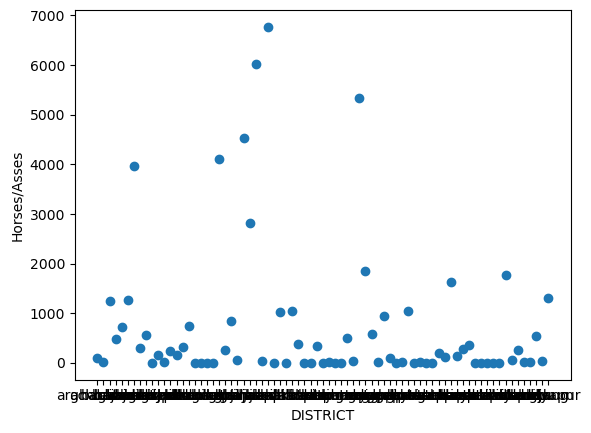

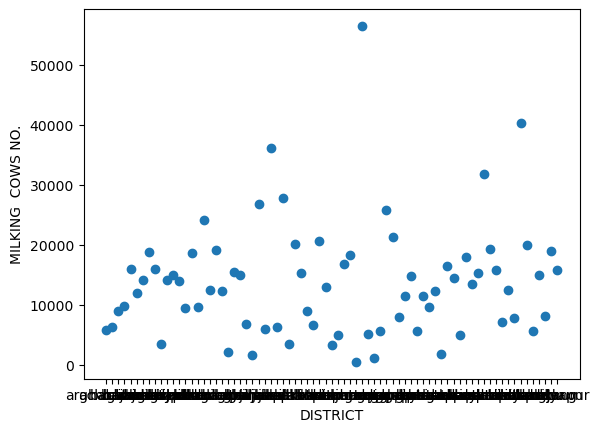

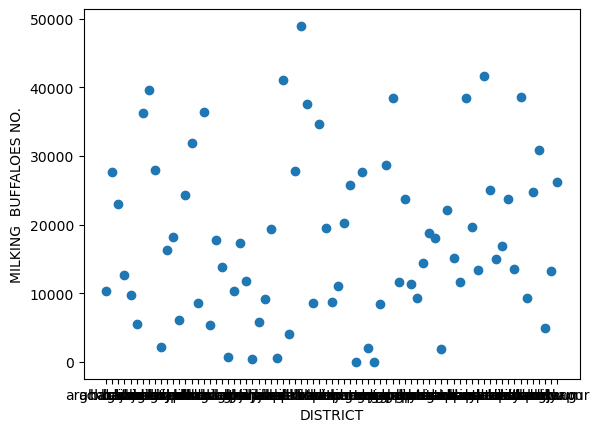

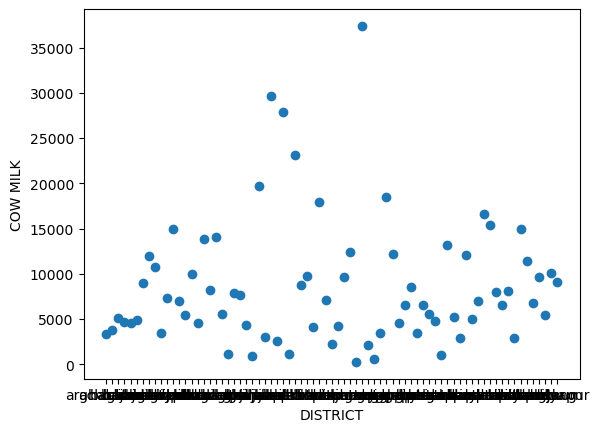

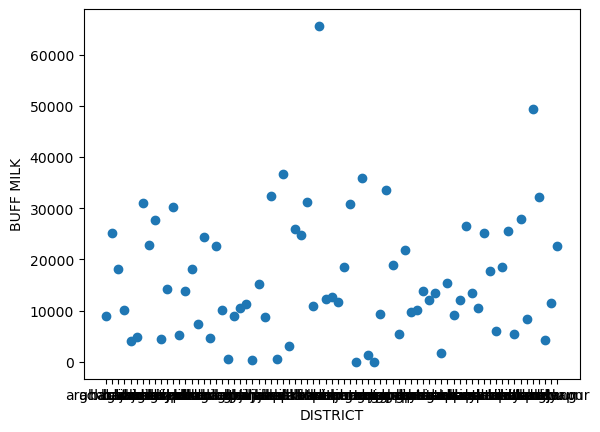

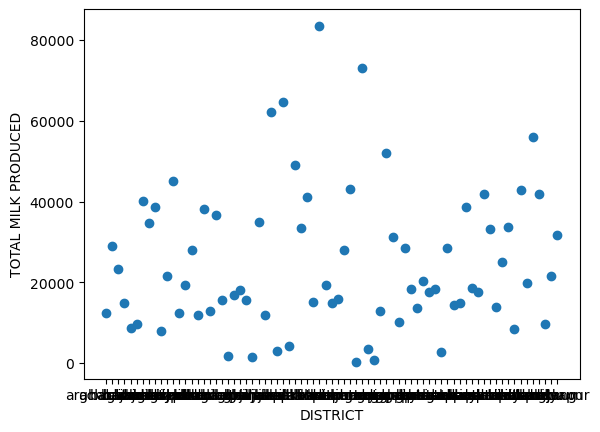

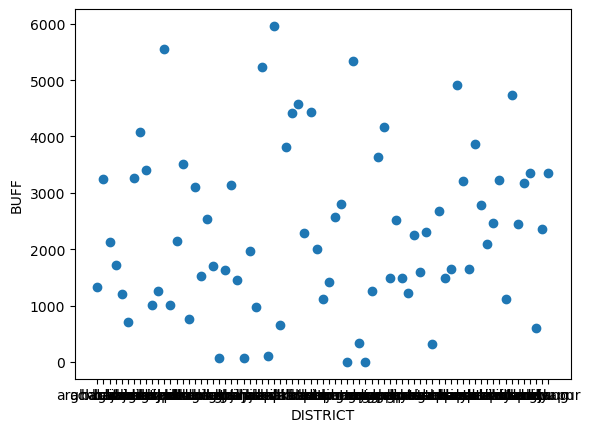

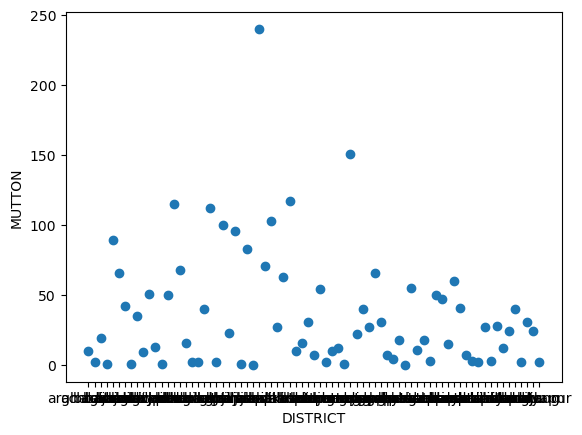

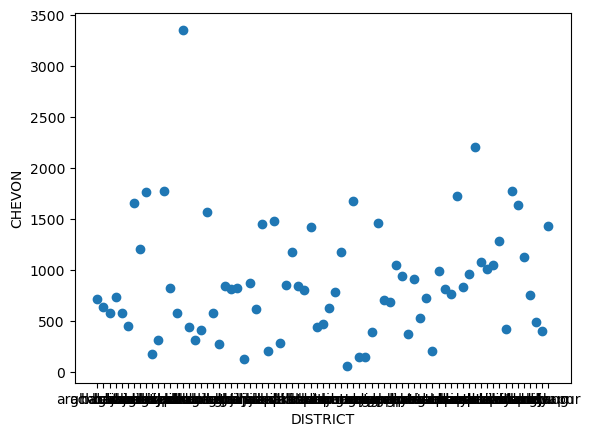

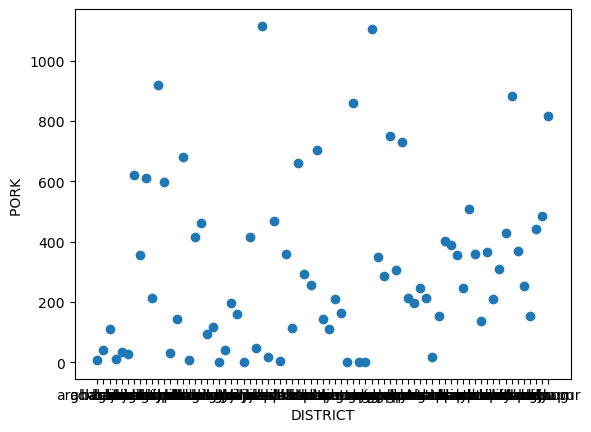

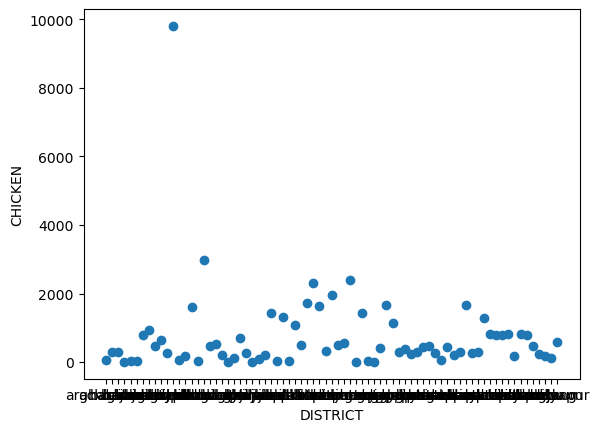

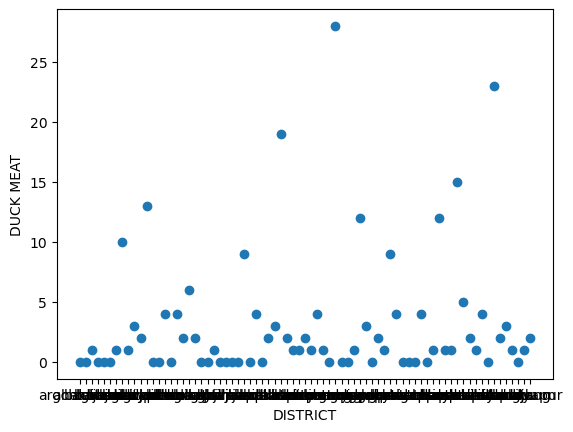

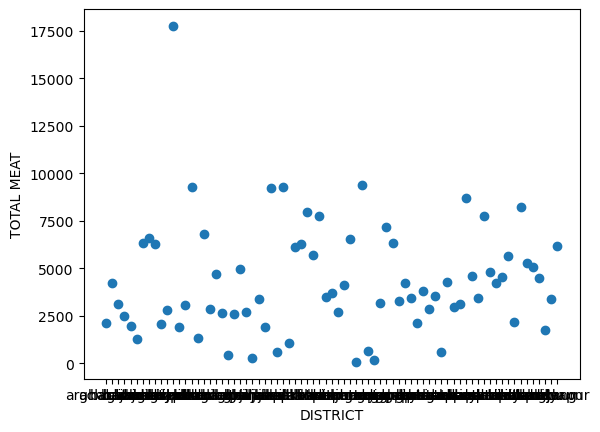

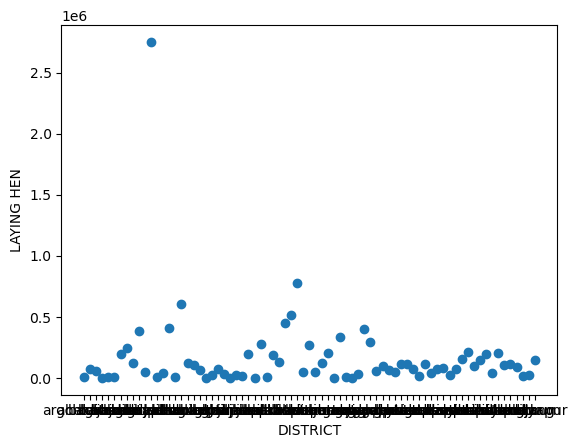

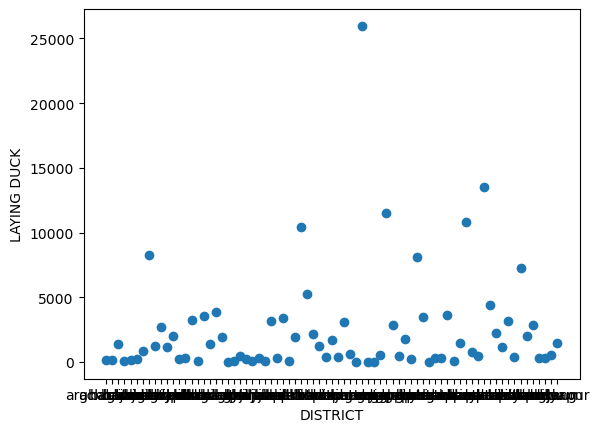

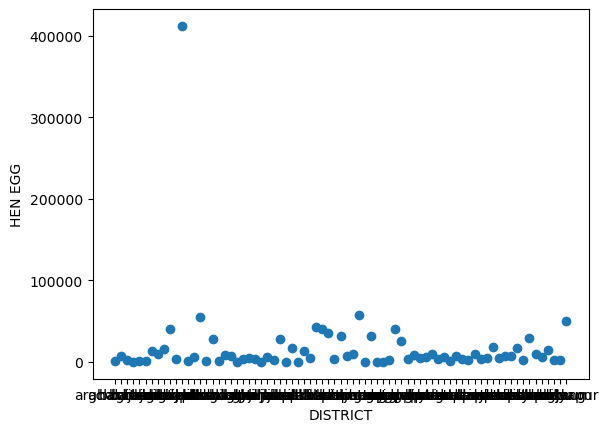

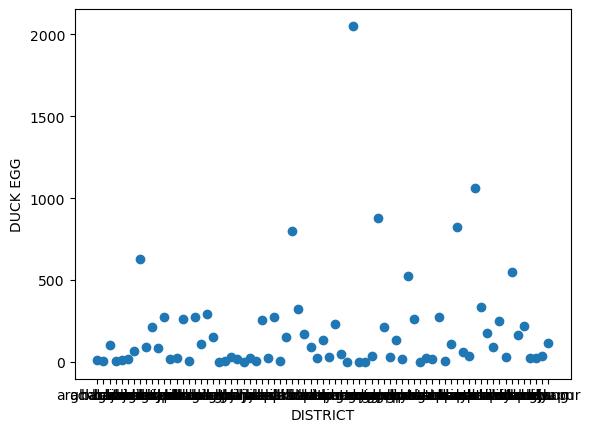

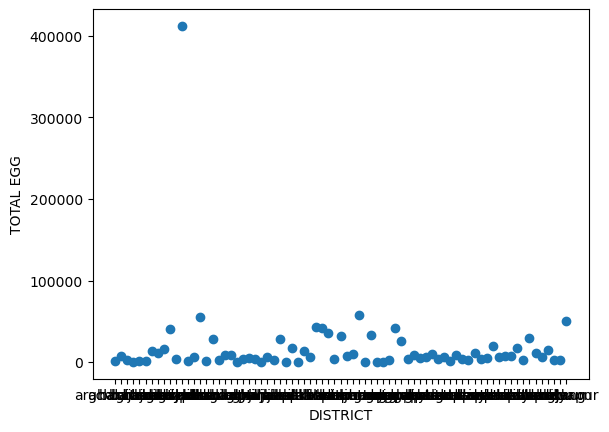

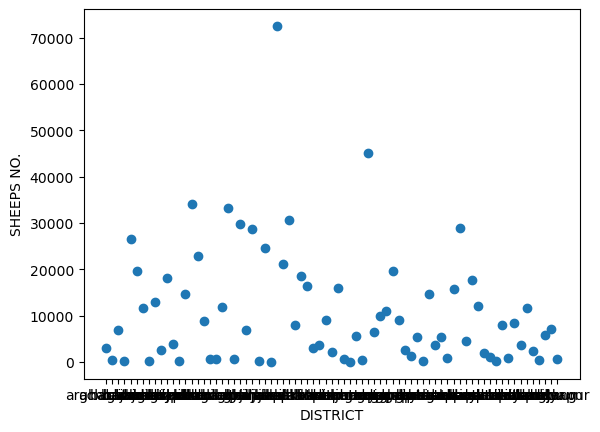

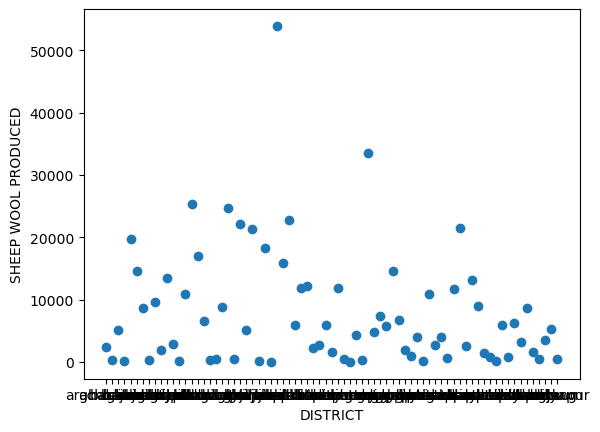

In [101]:
outliersGraph(merged_dataset)

In [102]:
# For convenience, displaying the name of columns
merged_dataset.columns.values

array(['DISTRICT', 'Horses/Asses', 'MILKING  COWS NO.',
       'MILKING  BUFFALOES NO.', 'COW MILK', 'BUFF MILK',
       'TOTAL MILK PRODUCED', 'BUFF', 'MUTTON', 'CHEVON', 'PORK ',
       'CHICKEN', 'DUCK MEAT', 'TOTAL MEAT', 'LAYING HEN', 'LAYING DUCK',
       'HEN EGG', 'DUCK EGG', 'TOTAL EGG', 'SHEEPS NO.',
       'SHEEP WOOL PRODUCED', 'PROVINCE'], dtype=object)

### Similar to the dataframe df1, df2, ... checking the outliers in the final dataset

In [103]:
outliersData(merged_dataset, 'MILKING  COWS NO.', 40000)

MILKING  COWS NO. in morang is: 56521.0
MILKING  COWS NO. in sunsari is: 40311.0


In [104]:
outliersData(merged_dataset, 'COW MILK', 35000)

COW MILK in morang is: 37387.0


In [105]:
outliersData(merged_dataset, 'BUFF MILK', 40000)

BUFF MILK in kavre is: 65590.0
BUFF MILK in syangja is: 49275.0


In [106]:
outliersData(merged_dataset, 'MUTTON', 160)

MUTTON in jumla is: 240.0


In [107]:
outliersData(merged_dataset, 'CHEVON', 2500)

CHEVON in dang is: 3352.0


In [108]:
outliersData(merged_dataset, 'CHICKEN', 4000)

CHICKEN in chitwan is: 9810.0


In [109]:
outliersData(merged_dataset, 'TOTAL MEAT', 10000)

TOTAL MEAT in chitwan is: 17753.0


In [110]:
outliersData(merged_dataset, 'LAYING HEN', 1000000)

LAYING HEN in chitwan is: 2751238.0


In [111]:
outliersData(merged_dataset, 'LAYING DUCK', 15000)

LAYING DUCK in morang is: 25971.0


In [112]:
outliersData(merged_dataset, 'HEN EGG', 100000)

HEN EGG in chitwan is: 411901.0


In [113]:
outliersData(merged_dataset, 'DUCK EGG', 1500)

DUCK EGG in morang is: 2052.0


In [114]:
outliersData(merged_dataset, 'TOTAL EGG', 100000)

TOTAL EGG in chitwan is: 412175.0


In [115]:
outliersData(merged_dataset, 'SHEEPS NO.', 50000)

SHEEPS NO. in jumla is: 72530.0


In [116]:
outliersData(merged_dataset, 'SHEEP WOOL PRODUCED', 35000)

SHEEP WOOL PRODUCED in jumla is: 53889.0


#### As the OUTLIERS seems to be valid, it can be left as it is

### CLEAN dataset

In [117]:
cleaned_dataset = merged_dataset.copy()
cleaned_dataset

,DISTRICT,Horses/Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,DUCK MEAT,TOTAL MEAT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,SHEEPS NO.,SHEEP WOOL PRODUCED,PROVINCE
0,achham,95.0,5796.0,10381.0,3321.0,9010.0,12331.0,1329.0,10.0,710.0,...,0.0,2102.0,12096.0,143.0,1905.0,9.0,1914.0,3085.0,2400.0,sudurpachchim
1,arghakhanchi,17.0,6219.0,27698.0,3805.0,25232.0,29037.0,3246.0,2.0,638.0,...,0.0,4231.0,77924.0,118.0,7289.0,7.0,7296.0,496.0,369.0,lumbini
2,baglung,1250.0,8950.0,22929.0,5128.0,18093.0,23221.0,2124.0,19.0,578.0,...,1.0,3128.0,57523.0,1370.0,2199.0,104.0,2303.0,6851.0,5090.0,gandaki
3,baitadi,484.0,9845.0,12699.0,4641.0,10184.0,14825.0,1727.0,1.0,730.0,...,0.0,2484.0,3509.0,107.0,594.0,6.0,600.0,304.0,225.0,sudurpachchim
4,bajhang,724.0,15936.0,9679.0,4600.0,4149.0,8749.0,1208.0,89.0,572.0,...,0.0,1943.0,8917.0,188.0,985.0,14.0,999.0,26452.0,19653.0,sudurpachchim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,syangja,17.0,5694.0,24818.0,6805.0,49275.0,56080.0,3177.0,40.0,1129.0,...,3.0,5058.0,116948.0,2888.0,5846.0,219.0,6065.0,2401.0,1580.0,gandaki
71,tanahu,16.0,14942.0,30798.0,9678.0,32272.0,41950.0,3347.0,2.0,752.0,...,1.0,4479.0,91121.0,318.0,14352.0,24.0,14376.0,548.0,407.0,gandaki
72,taplejung,543.0,8123.0,4987.0,5389.0,4257.0,9645.0,607.0,31.0,491.0,...,0.0,1744.0,15366.0,341.0,2420.0,25.0,2445.0,5777.0,3519.0,koshi
73,terathum,42.0,18880.0,13276.0,10089.0,11500.0,21589.0,2358.0,24.0,399.0,...,1.0,3384.0,26030.0,514.0,3000.0,39.0,3039.0,7083.0,5262.0,koshi


## SUMMARY of the cleaned dataset

In [118]:
cleaned_dataset.describe(include='all')


# In the summary table below,
# 1) The rows count, mean, std, min, max and, lower, mid and upper percentiles are for numeric data types
# 2) The rows  count, unique, top, and freq are for object data types

# -> The count row has information on how many values a column has.
# -> The unique row has how many unique value is present in the column
# -> The top row has the most common value. In the given dataset, there is rarely any value that is repeated.
# -> The freq row has the frequency of how many times the most repeated value has occured or is present.
# -> The mean row has the average of the column
# -> The std row has the standard deviation of the column
# -> The min row has the least value in the column.
# -> The 25% row has the lower percentile value of the column.
# -> The 50% row has the mid percentile value of the column.
# -> The 75% row has the upper percentile value of the column.
# -> The max row has the highest value in the column.

,DISTRICT,Horses/Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,DUCK MEAT,TOTAL MEAT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,SHEEPS NO.,SHEEP WOOL PRODUCED,PROVINCE
count,75,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,...,75.000000,75.000000,7.500000e+01,75.00000,75.000000,75.000000,75.000000,75.000000,75.000000,75
unique,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,achham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,koshi
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
mean,NaN,744.106667,13681.80000,18071.786667,8584.093333,16139.226667,24723.306667,2333.400000,35.786667,874.440000,...,3.160000,4294.120000,1.647136e+05,2412.36000,17255.546667,185.413333,17440.960000,10675.440000,7844.640000,NaN
std,NaN,1436.458686,9380.16219,12057.854970,6841.254483,12123.710948,17437.911423,1457.076673,42.003955,564.018982,...,5.370188,2889.555595,3.379117e+05,4012.96099,48325.278732,311.006739,48367.426846,12518.974483,9300.782168,NaN
min,NaN,0.000000,452.00000,0.000000,259.000000,0.000000,259.000000,0.000000,0.000000,56.000000,...,0.000000,78.000000,1.488000e+03,3.00000,210.000000,0.000000,211.000000,36.000000,13.000000,NaN
25%,NaN,0.000000,6716.50000,9191.500000,4293.500000,8591.000000,12781.500000,1253.500000,5.500000,459.500000,...,0.000000,2548.500000,2.640550e+04,270.50000,2646.000000,20.000000,2713.500000,1262.500000,937.500000,NaN
50%,NaN,142.000000,12998.00000,16342.000000,6988.000000,12595.000000,19350.000000,2145.000000,23.000000,801.000000,...,1.000000,3539.000000,7.853800e+04,1136.00000,6502.000000,88.000000,6683.000000,6851.000000,5090.000000,NaN
75%,NaN,738.500000,17397.00000,25979.000000,11098.500000,24583.500000,34843.000000,3251.000000,50.500000,1150.000000,...,3.500000,6158.000000,1.903080e+05,2986.00000,14904.500000,241.000000,14962.500000,15824.000000,11757.000000,NaN


### CORRELATION MATRIX

In [119]:
# For better analysis separating the numeric and categorical data
df_numerical_features = cleaned_dataset.select_dtypes(include='number')
df_categorical_features = cleaned_dataset.select_dtypes(include='category')

In [120]:
# creating the correlation matrix on the numerical columns
correlation_matrix = df_numerical_features.corr()
correlation_matrix

,Horses/Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,SHEEPS NO.,SHEEP WOOL PRODUCED
Horses/Asses,1.000000,-0.279463,-0.322407,-0.285381,-0.318752,-0.333573,-0.391602,0.663637,-0.274711,-0.236362,-0.211937,-0.227930,-0.355657,-0.179318,-0.199555,-0.131001,-0.203148,-0.132193,0.681722,0.683817
MILKING COWS NO.,-0.279463,1.000000,0.568883,0.902348,0.540606,0.729867,0.711038,-0.270036,0.607954,0.503541,0.244728,0.676762,0.628162,0.187321,0.668618,0.133355,0.683424,0.137634,-0.255380,-0.258608
MILKING BUFFALOES NO.,-0.322407,0.568883,1.000000,0.565044,0.777311,0.762105,0.860135,-0.169038,0.632476,0.327530,0.290638,0.495733,0.712020,0.237565,0.509672,0.135579,0.506436,0.138717,-0.213361,-0.224044
COW MILK,-0.285381,0.902348,0.565044,1.000000,0.664886,0.854584,0.779079,-0.278308,0.584429,0.480617,0.360445,0.618412,0.705138,0.309148,0.616640,0.230890,0.633195,0.234761,-0.286733,-0.291490
BUFF MILK,-0.318752,0.540606,0.777311,0.664886,1.000000,0.956100,0.828175,-0.264192,0.602445,0.331889,0.407543,0.465554,0.739227,0.403541,0.422742,0.284940,0.427796,0.287442,-0.325362,-0.332385
TOTAL MILK PRODUCED,-0.333573,0.729867,0.762105,0.854584,0.956100,1.000000,0.881438,-0.292865,0.648134,0.419302,0.424755,0.566292,0.790589,0.401847,0.535832,0.288688,0.545841,0.291946,-0.338699,-0.345448
BUFF,-0.391602,0.711038,0.860135,0.779079,0.828175,0.881438,1.000000,-0.250610,0.721056,0.464644,0.527985,0.637701,0.914056,0.479426,0.558661,0.399311,0.570969,0.402634,-0.293950,-0.301230
MUTTON,0.663637,-0.270036,-0.169038,-0.278308,-0.264192,-0.292865,-0.250610,1.000000,-0.187381,-0.177442,-0.143979,-0.162199,-0.227641,-0.117918,-0.191762,-0.100732,-0.199070,-0.101925,0.967302,0.966662
CHEVON,-0.274711,0.607954,0.632476,0.584429,0.602445,0.648134,0.721056,-0.187381,1.000000,0.411703,0.392021,0.496475,0.765010,0.342484,0.466250,0.327792,0.482623,0.330610,-0.193256,-0.197802
PORK,-0.236362,0.503541,0.327530,0.480617,0.331889,0.419302,0.464644,-0.177442,0.411703,1.000000,0.258450,0.436042,0.520238,0.227272,0.270870,0.220708,0.278944,0.222309,-0.196362,-0.196472


#### Representing it in better visual way:

<Axes: >

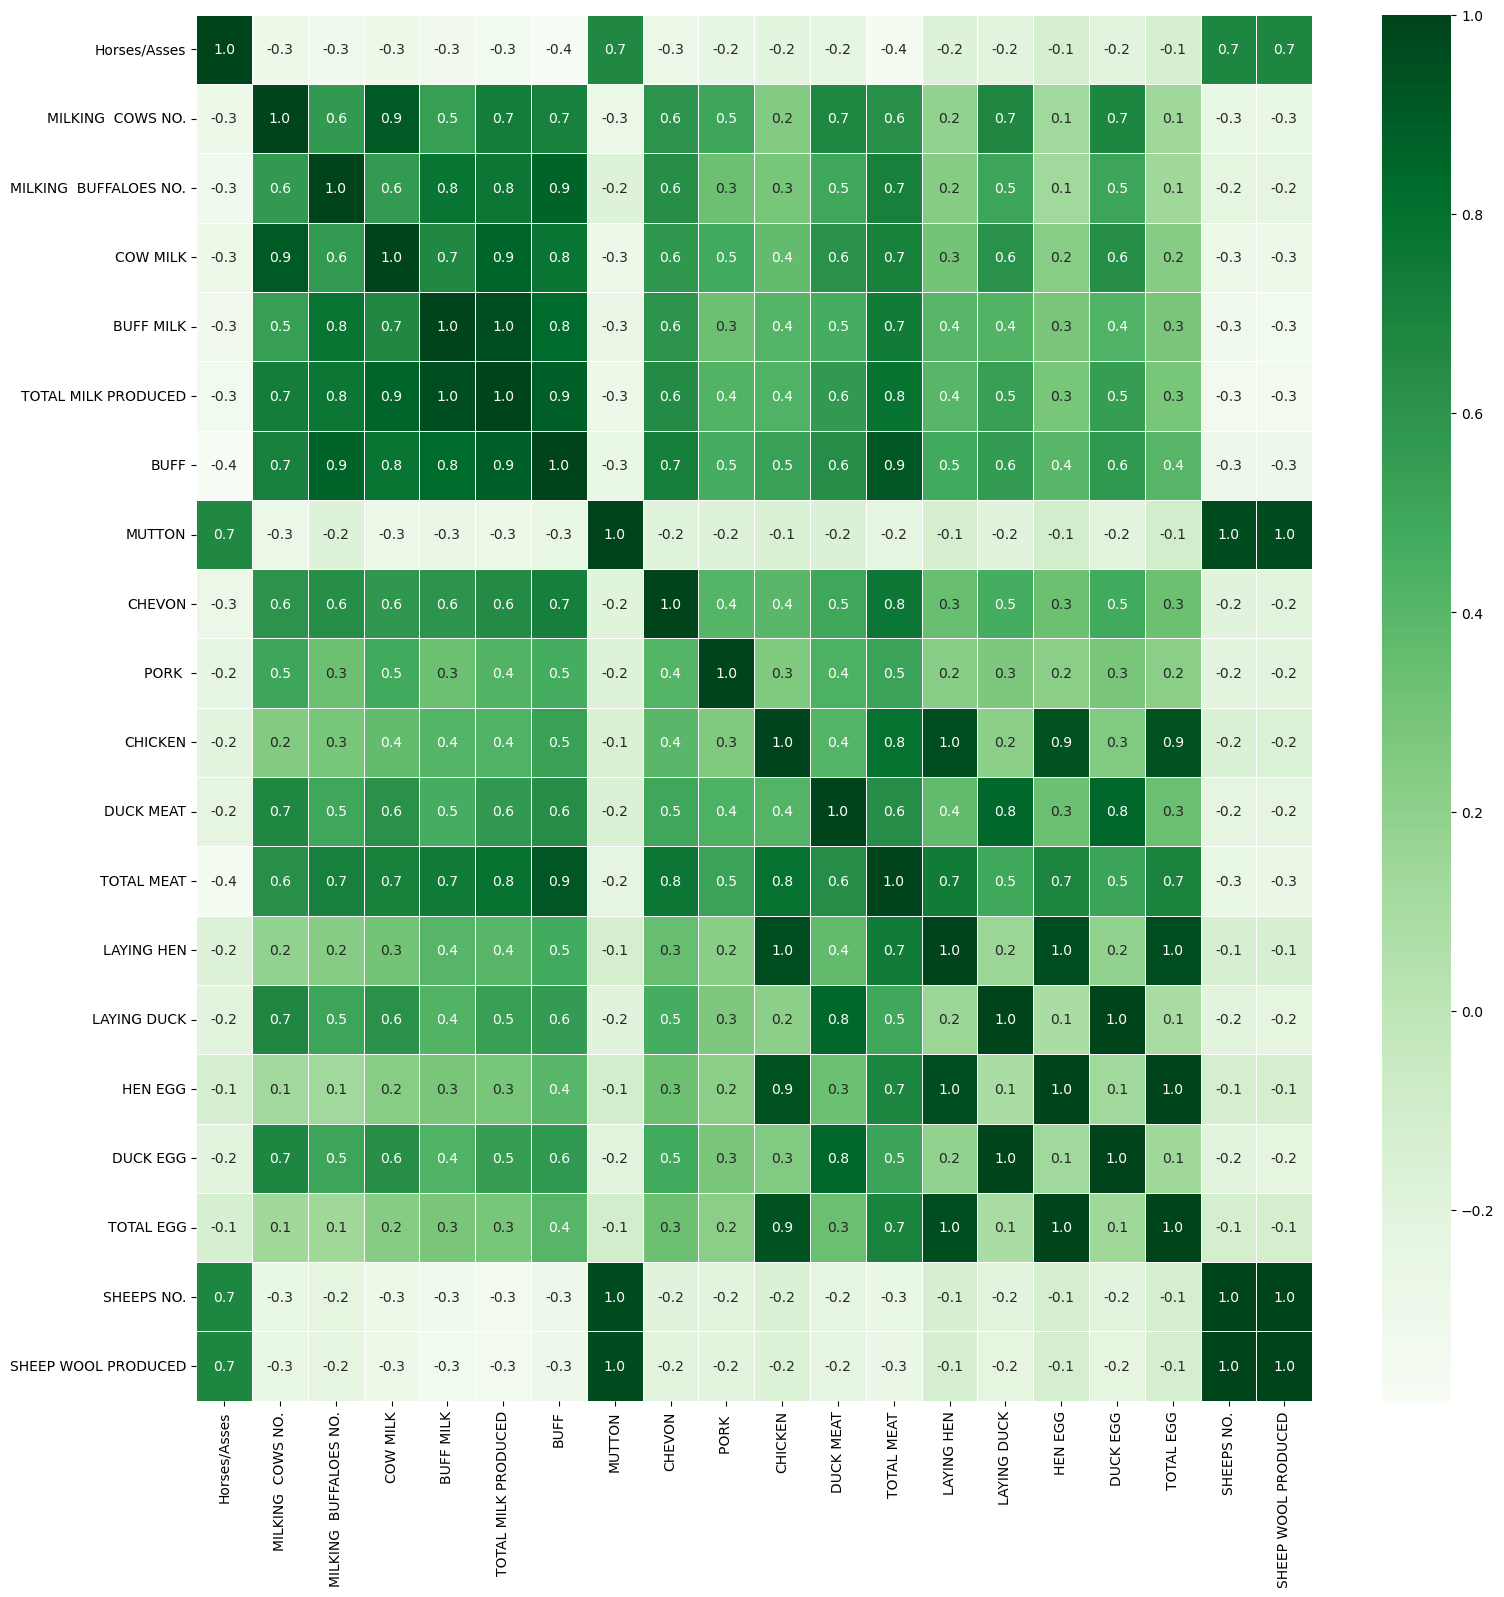

In [121]:
# sns.heatmap(correlation_matrix, cmap="Greens", xticklabels=True, yticklabels=True)
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="Greens")

In [122]:
# Defining a function to calculate the correlation between two columns
def corr(col1, col2):
    correlation = df_numerical_features[col1].corr(df_numerical_features[col2])
    print(f"Correlation between {col1} and {col2} is: {round(correlation,2)}")


In [123]:
# Displaying few of the correlations

corr('MILKING  COWS NO.','COW MILK')
corr('Horses/Asses', 'PORK ')
corr('TOTAL EGG', 'SHEEPS NO.')
corr('SHEEPS NO.', 'SHEEP WOOL PRODUCED')
corr('LAYING HEN', 'TOTAL EGG')
corr('CHEVON', 'CHEVON')
corr('TOTAL MEAT', 'Horses/Asses')
corr('TOTAL MEAT', 'LAYING HEN')

Correlation between MILKING  COWS NO. and COW MILK is: 0.9
Correlation between Horses/Asses and PORK  is: -0.24
Correlation between TOTAL EGG and SHEEPS NO. is: -0.12
Correlation between SHEEPS NO. and SHEEP WOOL PRODUCED is: 1.0
Correlation between LAYING HEN and TOTAL EGG is: 0.96
Correlation between CHEVON and CHEVON is: 1.0
Correlation between TOTAL MEAT and Horses/Asses is: -0.36
Correlation between TOTAL MEAT and LAYING HEN is: 0.74


In [124]:
# The correlation between MILKING  COWS NO. and COW MILK is 0.9 which means that there is very high positive corelation.
# The correlation between Horses/Asses and PORK  is: -0.24 which means that there is negligible negative correlation.
# The correlation between TOTAL EGG and SHEEPS NO. is: -0.12 which means that there is negligible negative correlation.
# The correlation between SHEEPS NO. and SHEEP WOOL PRODUCED is: 1.0 which means that there is very high positive corelation.
# The correlation between LAYING HEN and TOTAL EGG is: 0.96 which means that there is very high positive corelation.
# The correlation between CHEVON and CHEVON is: 1.0 which means that there is very high positive corelation.
# The correlation between TOTAL MEAT and Horses/Asses is: -0.36 which means that there is low negative corelation.
# The Correlation between TOTAL MEAT and LAYING HEN is: 0.74 which means high positive correlation.

### To display the name of the district along with the production and count the number of districts, defining a function

In [125]:
def productionOverAvg(column):
    meanProduction = cleaned_dataset[column].describe().loc['mean']
    count = 0
    for i in range(cleaned_dataset.shape[0]):
         if cleaned_dataset[column][i] >= meanProduction:
             print(f'{cleaned_dataset["DISTRICT"][i]}: {cleaned_dataset[column][i]}')
             count = count+1
    print(f"\nIn {count} districts Production is greater than or equal to average production")

### List and count the districts where the cows' milk production >= average production.

In [126]:
# To dsiplay the districts where cow milk production is equal to or greater than the average production
print("Cow Milk production in Districts where cow milk production is greater than or equal to average production is:\n")
productionOverAvg("COW MILK")

Cow Milk production in Districts where cow milk production is greater than or equal to average production is:

banke: 8956.0
bara: 11952.0
bardiya: 10792.0
chitwan: 14947.0
dang: 9984.0
dhading: 13791.0
dhanusha: 14056.0
illam: 19735.0
jhapa: 29667.0
kailali: 27905.0
kanchanpur: 23146.0
kapilbastu: 8778.0
kaski: 9782.0
kavre: 17919.0
mahottari: 9661.0
makwanpur: 12440.0
morang: 37387.0
nawalparasi: 18451.0
nuwakot: 12234.0
rautahat: 13162.0
rupandehi: 12120.0
saptari: 16654.0
sarlahi: 15374.0
sunsari: 14964.0
surkhet: 11405.0
tanahu: 9678.0
terathum: 10089.0
udayapur: 9092.0

In 28 districts Production is greater than or equal to average production


### List and count districts where milk production from cows and buffaloes >= average production.

In [127]:
# To dsiplay the districts where cow and buffaloe milk production is equal to or greater than the average production
print("Total Milk production in Districts where Cow milk and Buffaloe milk production is greater than or equal to average production is:\n")
productionOverAvg("TOTAL MILK PRODUCED")

Total Milk production in Districts where Cow milk and Buffaloe milk production is greater than or equal to average production is:

arghakhanchi: 29037.0
banke: 40018.0
bara: 34690.0
bardiya: 38576.0
chitwan: 45177.0
dang: 28027.0
dhading: 38207.0
dhanusha: 36766.0
illam: 34996.0
jhapa: 62124.0
kailali: 64582.0
kanchanpur: 49022.0
kapilbastu: 33529.0
kaski: 41016.0
kavre: 83509.0
mahottari: 28108.0
makwanpur: 43214.0
morang: 73207.0
nawalparasi: 52047.0
nuwakot: 31171.0
palpa: 28402.0
rautahat: 28531.0
rupandehi: 38613.0
saptari: 41882.0
sarlahi: 33199.0
sindhupalchok: 25023.0
siraha: 33749.0
sunsari: 42858.0
syangja: 56080.0
tanahu: 41950.0
udayapur: 31779.0

In 31 districts Production is greater than or equal to average production


### SPLITTING the dataset

In [128]:
# Extracting the columns for analysis
buff = cleaned_dataset['BUFF']
meat_class = pd.cut(cleaned_dataset['TOTAL MEAT'], bins=3, labels=["Low", "Medium", "High"])

# Splitting the dataset into train test
x_train, x_test, y_train, y_test = train_test_split(buff, meat_class, test_size=0.2, random_state=89)

# Re-shaping the x values into 2D array
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

### Creating a model using CLASSIFICATION model: LOGISTIC Regression

In [129]:
# Creating a model using Logistic regression
clf = LogisticRegression()

# Fitting the training values into the model
clf.fit(x_train, y_train)

# Predicting the values of y_test on the basis of x_test
predictions = clf.predict(x_test)

### Evaluating performance of the model using metrics: ACCURACY, PRECISION, RECALL SCORE

In [130]:
# Calculating the accuracy of the model
acc = accuracy_score(y_test, predictions)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 80.0


In [131]:
# Calculating the precision of the model
precision = precision_score(y_test, predictions, average=None, zero_division=0)
print("Logistic Regression model precision:", precision)

Logistic Regression model precision: [0.    1.    0.625]


In [132]:
# Calculating the recall score of the model
recallScore = recall_score(y_test, predictions, average=None)
print("Logistic Regression model recall score:", recallScore)

Logistic Regression model recall score: [0.         0.77777778 1.        ]


### SAVING the clean dataset

In [133]:
# Saving the cleaned dataset to the project folder
cleaned_dataset.to_csv('cleaned_dataset.csv', index=False)